# Recommender System for the products 

In [1]:
!pip install turicreate


In [2]:
import pandas as pd
import numpy as np
import time
import turicreate as tc
from sklearn.model_selection  import train_test_split
import pandas as pd 
# Get the data 
column_names = ['user_id', 'item_id', 'rating', 'timestamp'] 

df = pd.read_csv('/content/data_file.csv', names=column_names) 
df.head(5)



,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [3]:
# Check out all the movies and their respective IDs 
movie_titles = pd.read_csv('/content/Movie_Id_Titles1.csv') 
movie_titles.head(5) 


,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [4]:
Merge_Movie_files = pd.merge(df, movie_titles, on='item_id') 
Merge_Movie_files.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [5]:
# Calculate mean rating of all movies 
Merge_Movie_files.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [6]:
# Calculate count rating of all movies 
Merge_Movie_files.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [7]:
# creating dataframe with 'rating' count values 
ratings = pd.DataFrame(Merge_Movie_files.groupby('title')['rating'].mean())  
  
ratings['num of ratings'] = pd.DataFrame(Merge_Movie_files.groupby('title')['rating'].count()) 
ratings.rename(columns = {'rating':'Rating_mean'}, inplace = True) 
ratings.head()

,Rating_mean,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [8]:
Merge_Movie_files1 = pd.merge(Merge_Movie_files, ratings, on='title') 
Merge_Movie_files1.head()

,user_id,item_id,rating,timestamp,title,Rating_mean,num of ratings
0,0,50,5,881250949,Star Wars (1977),4.359589,584
1,290,50,5,880473582,Star Wars (1977),4.359589,584
2,79,50,4,891271545,Star Wars (1977),4.359589,584
3,2,50,5,888552084,Star Wars (1977),4.359589,584
4,8,50,5,879362124,Star Wars (1977),4.359589,584


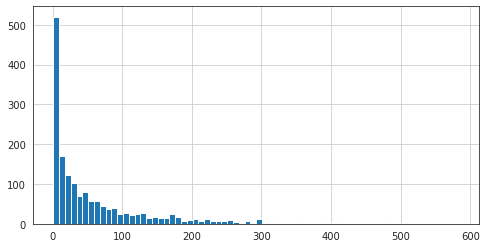

In [9]:
import matplotlib.pyplot as plt 
import seaborn as sns 
  
sns.set_style('white') 
%matplotlib inline 
# plot graph of 'num of ratings column' 
plt.figure(figsize =(8, 4)) 
  
ratings['num of ratings'].hist(bins = 70) 

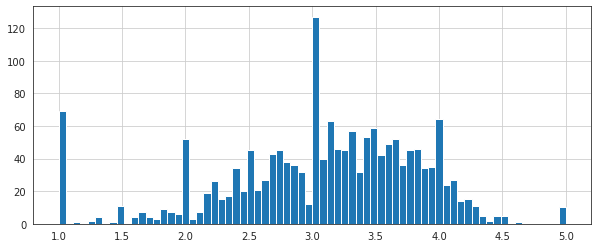

In [10]:
# plot graph of 'ratings' column 
plt.figure(figsize =(10, 4)) 
  
ratings['Rating_mean'].hist(bins = 70) 

In [11]:
# Sorting values according to  
# the 'num of rating column' 
moviemat = Merge_Movie_files.pivot_table(index ='user_id', 
              columns ='title', values ='rating') 
  
#print(moviemat.head() )
  
ratings.sort_values('num of ratings', ascending = False).head(10) 

,Rating_mean,num of ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [12]:

# analysing correlation with similar movies 
starwars_user_ratings = moviemat['Star Wars (1977)'] 
liarliar_user_ratings = moviemat['Liar Liar (1997)'] 
  
starwars_user_ratings.head()  


user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [13]:
# analysing correlation with similar movies 
similar_to_starwars = moviemat.corrwith(starwars_user_ratings) 
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings) 
  
corr_starwars = pd.DataFrame(similar_to_starwars, columns =['Correlation']) 
corr_starwars.dropna(inplace = True) 
  
corr_starwars.head()  

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [14]:
# Similar movies like starwars 
corr_starwars.sort_values('Correlation', ascending = False).head(10) 
corr_starwars = corr_starwars.join(ratings['num of ratings']) 
  
corr_starwars.head() 
  
corr_starwars[corr_starwars['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [15]:
# Similar movies as of liarliar 
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns =['Correlation']) 
corr_liarliar.dropna(inplace = True) 
  
corr_liarliar = corr_liarliar.join(ratings['num of ratings']) 
corr_liarliar[corr_liarliar['num of ratings']>100].sort_values('Correlation', ascending = False).head() 

,Correlation,num of ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137


In [16]:
### Assignment generate movie recommendations for different users using turicreate package

In [17]:
#Create dummy


In [18]:
def create_data_dummy(data):
    data_dummy = data.copy()
    data_dummy['rating_dummy'] = 1
    return data_dummy
data_dummy = create_data_dummy(Merge_Movie_files1)
#print(data_dummy)

In [19]:
#Normalize item values across users

In [20]:
df_matrix = pd.pivot_table(Merge_Movie_files1, values='rating', index='user_id', columns='item_id')
df_matrix.head()

item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,1.0,3.0,3.0,5.0,4.0,2.0,1.0,2.0,2.0,3.0,4.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
(df_matrix.shape)

(944, 1682)

In [22]:
df_matrix_norm = (df_matrix-df_matrix.min())/(df_matrix.max()-df_matrix.min())
print(df_matrix_norm.shape)
df_matrix_norm.head()

(944, 1682)


item_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,0.5,0.75,0.5,0.5,1.0,0.75,0.0,1.0,0.50,0.25,1.0,1.00,1.00,1.0,1.0,0.5,0.75,1.0,0.75,0.0,0.75,0.666667,0.5,0.75,0.5,0.25,0.666667,0.0,0.5,0.5,1.0,0.75,0.25,0.0,0.333333,0.333333,0.5,0.75,0.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,NaN,NaN,0.75,0.75,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# create a table for input to the modeling

d = df_matrix_norm.reset_index()
d.index.names = ['scaled_rating_freq']
data_norm = pd.melt(d, id_vars=['user_id'], value_name='scaled_rating_freq').dropna()
print(data_norm.shape)
data_norm.head()

(99793, 3)


,user_id,item_id,scaled_rating_freq
1,1,1,1.00
2,2,1,0.75
5,5,1,0.75
6,6,1,0.75
10,10,1,0.75


In [24]:
# define a function for spliting data

def split_data(data):
    
    train, test = train_test_split(data, test_size = .2)
    train_data = tc.SFrame(train)
    test_data = tc.SFrame(test)
    return train_data, test_data

In [25]:
# lets try with normal, dummy table and scaled/normalized rating table
train_data_split, test_data_split = split_data(Merge_Movie_files1)
#print(train_data_split)
train_data_dummy, test_data_dummy = split_data(data_dummy)
#print(train_data_dummy)
#print(test_data_dummy)
train_data_norm, test_data_norm = split_data(data_norm)
#print(train_data_norm)

In [26]:
#Baseline Model
  # Using a Popularity ( # of rating) model as a baseline
# variables to define field names
user_id = 'user_id'
item_id = 'item_id'
target = 'rating'
users_to_recommend = list(Merge_Movie_files1[user_id])
n_rec = 10 # number of items to recommend
n_display = 20

In [27]:
popularity_model = tc.popularity_recommender.create(train_data_split, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target)

Warning: Ignoring columns timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1654 items.

Data prepared in: 0.093978s

80002 observations to process; with 1654 unique items.

In [28]:
# Get recommendations for a list of users to recommend (from customers file)
# Printed below is head / top 30 rows for first 3 customers with 10 recommendations each

popularity_recomm = popularity_model.recommend(users=users_to_recommend, k=n_rec)
popularity_recomm.print_rows(n_display)

recommendations finished on 1000/100003 queries. users per second: 42753.3

recommendations finished on 2000/100003 queries. users per second: 41062.7

recommendations finished on 3000/100003 queries. users per second: 41233.1

recommendations finished on 4000/100003 queries. users per second: 41269

recommendations finished on 5000/100003 queries. users per second: 41286.1

recommendations finished on 6000/100003 queries. users per second: 41098.4

recommendations finished on 7000/100003 queries. users per second: 40725.4

recommendations finished on 8000/100003 queries. users per second: 40398.9

recommendations finished on 9000/100003 queries. users per second: 40608.2

recommendations finished on 10000/100003 queries. users per second: 40344.4

recommendations finished on 11000/100003 queries. users per second: 40171.3

recommendations finished on 12000/100003 queries. users per second: 40315.9

recommendations finished on 13000/100003 queries. users per second: 40255.2

recommendations finished on 14000/100003 queries. users per second: 40400

recommendations finished on 15000/100003 queries. users per second: 40334.4

recommendations finished on 16000/100003 queries. users per second: 40289.1

recommendations finished on 17000/100003 queries. users per second: 40279.6

recommendations finished on 18000/100003 queries. users per second: 40401.3

recommendations finished on 19000/100003 queries. users per second: 40494.4

recommendations finished on 20000/100003 queries. users per second: 40536.5

recommendations finished on 21000/100003 queries. users per second: 40499.3

recommendations finished on 22000/100003 queries. users per second: 40545.4

recommendations finished on 23000/100003 queries. users per second: 40578

recommendations finished on 24000/100003 queries. users per second: 39564

recommendations finished on 25000/100003 queries. users per second: 39394.1

recommendations finished on 26000/100003 queries. users per second: 39210.5

recommendations finished on 27000/100003 queries. users per second: 39054.3

recommendations finished on 28000/100003 queries. users per second: 39153.7

recommendations finished on 29000/100003 queries. users per second: 39131.9

recommendations finished on 30000/100003 queries. users per second: 39202.3

recommendations finished on 31000/100003 queries. users per second: 39337.7

recommendations finished on 32000/100003 queries. users per second: 39242.9

recommendations finished on 33000/100003 queries. users per second: 39278.7

recommendations finished on 34000/100003 queries. users per second: 39293

recommendations finished on 35000/100003 queries. users per second: 38907

recommendations finished on 36000/100003 queries. users per second: 38940.9

recommendations finished on 37000/100003 queries. users per second: 38937.2

recommendations finished on 38000/100003 queries. users per second: 38962.9

recommendations finished on 39000/100003 queries. users per second: 39007.5

recommendations finished on 40000/100003 queries. users per second: 39011

recommendations finished on 41000/100003 queries. users per second: 39018.3

recommendations finished on 42000/100003 queries. users per second: 39036.3

recommendations finished on 43000/100003 queries. users per second: 39131

recommendations finished on 44000/100003 queries. users per second: 39101.8

recommendations finished on 45000/100003 queries. users per second: 39134.2

recommendations finished on 46000/100003 queries. users per second: 39052.1

recommendations finished on 47000/100003 queries. users per second: 39131.8

recommendations finished on 48000/100003 queries. users per second: 39202.4

recommendations finished on 49000/100003 queries. users per second: 39213.1

recommendations finished on 50000/100003 queries. users per second: 39258.8

recommendations finished on 51000/100003 queries. users per second: 39198.8

recommendations finished on 52000/100003 queries. users per second: 39095

recommendations finished on 53000/100003 queries. users per second: 38997.4

recommendations finished on 54000/100003 queries. users per second: 39065.9

recommendations finished on 55000/100003 queries. users per second: 39076.7

recommendations finished on 56000/100003 queries. users per second: 39106.3

recommendations finished on 57000/100003 queries. users per second: 39108.2

recommendations finished on 58000/100003 queries. users per second: 39060.1

recommendations finished on 59000/100003 queries. users per second: 39082.4

recommendations finished on 60000/100003 queries. users per second: 39101.6

recommendations finished on 61000/100003 queries. users per second: 39125.3

recommendations finished on 62000/100003 queries. users per second: 39075.6

recommendations finished on 63000/100003 queries. users per second: 39031.7

recommendations finished on 64000/100003 queries. users per second: 38992.8

recommendations finished on 65000/100003 queries. users per second: 38929.2

recommendations finished on 66000/100003 queries. users per second: 38934.2

recommendations finished on 67000/100003 queries. users per second: 38807.1

recommendations finished on 68000/100003 queries. users per second: 38797

recommendations finished on 69000/100003 queries. users per second: 38865.6

recommendations finished on 70000/100003 queries. users per second: 38835.3

recommendations finished on 71000/100003 queries. users per second: 38824.8

recommendations finished on 72000/100003 queries. users per second: 38748.3

recommendations finished on 73000/100003 queries. users per second: 38558.8

recommendations finished on 74000/100003 queries. users per second: 38611.5

recommendations finished on 75000/100003 queries. users per second: 38662.8

recommendations finished on 76000/100003 queries. users per second: 38711.1

recommendations finished on 77000/100003 queries. users per second: 38641.4

recommendations finished on 78000/100003 queries. users per second: 38613.9

recommendations finished on 79000/100003 queries. users per second: 38611.1

recommendations finished on 80000/100003 queries. users per second: 38619.5

recommendations finished on 81000/100003 queries. users per second: 38590.2

recommendations finished on 82000/100003 queries. users per second: 38629.1

recommendations finished on 83000/100003 queries. users per second: 38610.8

recommendations finished on 84000/100003 queries. users per second: 38606.4

recommendations finished on 85000/100003 queries. users per second: 38633.3

recommendations finished on 86000/100003 queries. users per second: 38614.2

recommendations finished on 87000/100003 queries. users per second: 38610.1

recommendations finished on 88000/100003 queries. users per second: 38630.3

recommendations finished on 89000/100003 queries. users per second: 38610.9

recommendations finished on 90000/100003 queries. users per second: 38622

recommendations finished on 91000/100003 queries. users per second: 38571.1

recommendations finished on 92000/100003 queries. users per second: 38586.3

recommendations finished on 93000/100003 queries. users per second: 38598.6

recommendations finished on 94000/100003 queries. users per second: 38572.4

recommendations finished on 95000/100003 queries. users per second: 38596.6

recommendations finished on 96000/100003 queries. users per second: 38548.7

recommendations finished on 97000/100003 queries. users per second: 38478

recommendations finished on 98000/100003 queries. users per second: 38455

recommendations finished on 99000/100003 queries. users per second: 38456.2

recommendations finished on 100000/100003 queries. users per second: 38441.6

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|    0    |   1122  |  5.0  |  5   |
|    0    |   1500  |  5.0  |  6   |
|    0    |   1293  |  5.0  |  7   |
|    0    |   1467  |  5.0  |  8   |
|    0    |   1653  |  5.0  |  9   |
|    0    |   1155  |  5.0  |  10  |
|   290   |   1189  |  5.0  |  1   |
|   290   |   1600  |  5.0  |  2   |
|   290   |   814   |  5.0  |  3   |
|   290   |   1617  |  5.0  |  4   |
|   290   |   1122  |  5.0  |  5   |
|   290   |   1500  |  5.0  |  6   |
|   290   |   1293  |  5.0  |  7   |
|   290   |   1467  |  5.0  |  8   |
|   290   |   1653  |  5.0  |  9   |
|   290   |   1155  |  5.0  |  10  |
+---------+---------+-------+------+
[1000030 rows x 4 columns]



In [29]:
# define a model selection function

def model(train_data, name, user_id, item_id, target, users_to_recommend, n_rec, n_display):
    if name == 'popularity':
        model = tc.popularity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target)
    elif name == 'cosine':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='cosine')
    elif name == 'pearson':
        model = tc.item_similarity_recommender.create(train_data, 
                                                    user_id=user_id, 
                                                    item_id=item_id, 
                                                    target=target, 
                                                    similarity_type='pearson')
        
    recom = model.recommend(users=users_to_recommend, k=n_rec)
    recom.print_rows(n_display)
    return model

In [30]:
# variables to define field names
# constant variables include:
user_id = 'user_id'
item_id = 'item_id'
users_to_recommend = list(df[user_id])
n_rec = 10 # number of items to recommend
n_display = 30 # to print the head / first few rows in a defined dataset

In [31]:
#Using Rating 
# these variables will change accordingly
name = 'popularity'
target = 'rating'
pop_Base = model(train_data_split, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1654 items.

Data prepared in: 0.096557s

80002 observations to process; with 1654 unique items.

recommendations finished on 1000/100003 queries. users per second: 41106.6

recommendations finished on 2000/100003 queries. users per second: 41379.6

recommendations finished on 3000/100003 queries. users per second: 40449.8

recommendations finished on 4000/100003 queries. users per second: 41285.2

recommendations finished on 5000/100003 queries. users per second: 39384.3

recommendations finished on 6000/100003 queries. users per second: 38494.9

recommendations finished on 7000/100003 queries. users per second: 37638.9

recommendations finished on 8000/100003 queries. users per second: 37929.4

recommendations finished on 9000/100003 queries. users per second: 38470.7

recommendations finished on 10000/100003 queries. users per second: 38905.8

recommendations finished on 11000/100003 queries. users per second: 38787.7

recommendations finished on 12000/100003 queries. users per second: 39062.8

recommendations finished on 13000/100003 queries. users per second: 38916.2

recommendations finished on 14000/100003 queries. users per second: 38952.1

recommendations finished on 15000/100003 queries. users per second: 39234.7

recommendations finished on 16000/100003 queries. users per second: 39235.7

recommendations finished on 17000/100003 queries. users per second: 39208.2

recommendations finished on 18000/100003 queries. users per second: 39526.1

recommendations finished on 19000/100003 queries. users per second: 39795

recommendations finished on 20000/100003 queries. users per second: 40001.1

recommendations finished on 21000/100003 queries. users per second: 40197.3

recommendations finished on 22000/100003 queries. users per second: 40064.2

recommendations finished on 23000/100003 queries. users per second: 40151.8

recommendations finished on 24000/100003 queries. users per second: 40165.2

recommendations finished on 25000/100003 queries. users per second: 40075

recommendations finished on 26000/100003 queries. users per second: 40279.6

recommendations finished on 27000/100003 queries. users per second: 40004

recommendations finished on 28000/100003 queries. users per second: 39897.8

recommendations finished on 29000/100003 queries. users per second: 39844.4

recommendations finished on 30000/100003 queries. users per second: 39694.9

recommendations finished on 31000/100003 queries. users per second: 39659.3

recommendations finished on 32000/100003 queries. users per second: 39029.4

recommendations finished on 33000/100003 queries. users per second: 39002.8

recommendations finished on 34000/100003 queries. users per second: 38996.8

recommendations finished on 35000/100003 queries. users per second: 39032

recommendations finished on 36000/100003 queries. users per second: 38974.4

recommendations finished on 37000/100003 queries. users per second: 38876.3

recommendations finished on 38000/100003 queries. users per second: 38668.5

recommendations finished on 39000/100003 queries. users per second: 38714.8

recommendations finished on 40000/100003 queries. users per second: 38781.3

recommendations finished on 41000/100003 queries. users per second: 38859.6

recommendations finished on 42000/100003 queries. users per second: 38859.4

recommendations finished on 43000/100003 queries. users per second: 38776.6

recommendations finished on 44000/100003 queries. users per second: 38608.9

recommendations finished on 45000/100003 queries. users per second: 38620

recommendations finished on 46000/100003 queries. users per second: 38613

recommendations finished on 47000/100003 queries. users per second: 38572.6

recommendations finished on 48000/100003 queries. users per second: 38565.7

recommendations finished on 49000/100003 queries. users per second: 38609

recommendations finished on 50000/100003 queries. users per second: 38583.6

recommendations finished on 51000/100003 queries. users per second: 38556.2

recommendations finished on 52000/100003 queries. users per second: 38538

recommendations finished on 53000/100003 queries. users per second: 38568.1

recommendations finished on 54000/100003 queries. users per second: 38547.4

recommendations finished on 55000/100003 queries. users per second: 38450.2

recommendations finished on 56000/100003 queries. users per second: 38198.8

recommendations finished on 57000/100003 queries. users per second: 38133.1

recommendations finished on 58000/100003 queries. users per second: 38104.8

recommendations finished on 59000/100003 queries. users per second: 38128.5

recommendations finished on 60000/100003 queries. users per second: 38166.1

recommendations finished on 61000/100003 queries. users per second: 38172.1

recommendations finished on 62000/100003 queries. users per second: 38222.8

recommendations finished on 63000/100003 queries. users per second: 38150.9

recommendations finished on 64000/100003 queries. users per second: 38198

recommendations finished on 65000/100003 queries. users per second: 38218.6

recommendations finished on 66000/100003 queries. users per second: 38227.5

recommendations finished on 67000/100003 queries. users per second: 38190.1

recommendations finished on 68000/100003 queries. users per second: 38184.7

recommendations finished on 69000/100003 queries. users per second: 38261.1

recommendations finished on 70000/100003 queries. users per second: 38254.2

recommendations finished on 71000/100003 queries. users per second: 38206.9

recommendations finished on 72000/100003 queries. users per second: 38243.2

recommendations finished on 73000/100003 queries. users per second: 38239.5

recommendations finished on 74000/100003 queries. users per second: 38294.1

recommendations finished on 75000/100003 queries. users per second: 38304.4

recommendations finished on 76000/100003 queries. users per second: 38289.6

recommendations finished on 77000/100003 queries. users per second: 38321.7

recommendations finished on 78000/100003 queries. users per second: 38379.8

recommendations finished on 79000/100003 queries. users per second: 38330.2

recommendations finished on 80000/100003 queries. users per second: 38323

recommendations finished on 81000/100003 queries. users per second: 38318

recommendations finished on 82000/100003 queries. users per second: 38358

recommendations finished on 83000/100003 queries. users per second: 38421.3

recommendations finished on 84000/100003 queries. users per second: 38472.8

recommendations finished on 85000/100003 queries. users per second: 38510.2

recommendations finished on 86000/100003 queries. users per second: 38499.3

recommendations finished on 87000/100003 queries. users per second: 38482.2

recommendations finished on 88000/100003 queries. users per second: 38523.4

recommendations finished on 89000/100003 queries. users per second: 38544.3

recommendations finished on 90000/100003 queries. users per second: 38515.1

recommendations finished on 91000/100003 queries. users per second: 38550.4

recommendations finished on 92000/100003 queries. users per second: 38573.1

recommendations finished on 93000/100003 queries. users per second: 38575.4

recommendations finished on 94000/100003 queries. users per second: 38571.7

recommendations finished on 95000/100003 queries. users per second: 38562.6

recommendations finished on 96000/100003 queries. users per second: 38570.3

recommendations finished on 97000/100003 queries. users per second: 38569.8

recommendations finished on 98000/100003 queries. users per second: 38537.1

recommendations finished on 99000/100003 queries. users per second: 38547.1

recommendations finished on 100000/100003 queries. users per second: 38566.6

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|    0    |   1122  |  5.0  |  5   |
|    0    |   1500  |  5.0  |  6   |
|    0    |   1293  |  5.0  |  7   |
|    0    |   1467  |  5.0  |  8   |
|    0    |   1653  |  5.0  |  9   |
|    0    |   1155  |  5.0  |  10  |
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|    0    |   1122  |  5.0  |  5   |
|    0    |   1500  |  5.0  |  6   |
|    0    |   1293  |  5.0  |  7   |
|    0    |   1467  |  5.0  |  8   |
|    0    |   1653  |  5.0  |  9   |
|    0    |   1155  |  5.0  |  10  |
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|

In [32]:
#Using Rating dummies
# these variables will change accordingly
name = 'popularity'
target = 'rating_dummy'
pop_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns rating, timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1647 items.

Data prepared in: 0.094029s

80002 observations to process; with 1647 unique items.

recommendations finished on 1000/100003 queries. users per second: 43425.4

recommendations finished on 2000/100003 queries. users per second: 40823.8

recommendations finished on 3000/100003 queries. users per second: 36368.9

recommendations finished on 4000/100003 queries. users per second: 36289.7

recommendations finished on 5000/100003 queries. users per second: 37137.4

recommendations finished on 6000/100003 queries. users per second: 36474.6

recommendations finished on 7000/100003 queries. users per second: 36535

recommendations finished on 8000/100003 queries. users per second: 36932.2

recommendations finished on 9000/100003 queries. users per second: 37214.2

recommendations finished on 10000/100003 queries. users per second: 37642.5

recommendations finished on 11000/100003 queries. users per second: 37116.8

recommendations finished on 12000/100003 queries. users per second: 37264.8

recommendations finished on 13000/100003 queries. users per second: 37089.1

recommendations finished on 14000/100003 queries. users per second: 37224

recommendations finished on 15000/100003 queries. users per second: 37185.8

recommendations finished on 16000/100003 queries. users per second: 37084.9

recommendations finished on 17000/100003 queries. users per second: 37258.9

recommendations finished on 18000/100003 queries. users per second: 37443.1

recommendations finished on 19000/100003 queries. users per second: 37421

recommendations finished on 20000/100003 queries. users per second: 37359.8

recommendations finished on 21000/100003 queries. users per second: 37277.5

recommendations finished on 22000/100003 queries. users per second: 36847.3

recommendations finished on 23000/100003 queries. users per second: 36953.8

recommendations finished on 24000/100003 queries. users per second: 36861.7

recommendations finished on 25000/100003 queries. users per second: 36832.8

recommendations finished on 26000/100003 queries. users per second: 36704.2

recommendations finished on 27000/100003 queries. users per second: 36797.2

recommendations finished on 28000/100003 queries. users per second: 36837.2

recommendations finished on 29000/100003 queries. users per second: 36859.5

recommendations finished on 30000/100003 queries. users per second: 36937

recommendations finished on 31000/100003 queries. users per second: 36967.7

recommendations finished on 32000/100003 queries. users per second: 36895

recommendations finished on 33000/100003 queries. users per second: 36869.9

recommendations finished on 34000/100003 queries. users per second: 36884.7

recommendations finished on 35000/100003 queries. users per second: 37028.5

recommendations finished on 36000/100003 queries. users per second: 36875

recommendations finished on 37000/100003 queries. users per second: 36986.2

recommendations finished on 38000/100003 queries. users per second: 36869.8

recommendations finished on 39000/100003 queries. users per second: 36856.5

recommendations finished on 40000/100003 queries. users per second: 36805.9

recommendations finished on 41000/100003 queries. users per second: 36777.7

recommendations finished on 42000/100003 queries. users per second: 36854.6

recommendations finished on 43000/100003 queries. users per second: 36879.9

recommendations finished on 44000/100003 queries. users per second: 36979.2

recommendations finished on 45000/100003 queries. users per second: 37007.5

recommendations finished on 46000/100003 queries. users per second: 36948.1

recommendations finished on 47000/100003 queries. users per second: 37027.3

recommendations finished on 48000/100003 queries. users per second: 36922.9

recommendations finished on 49000/100003 queries. users per second: 36984.2

recommendations finished on 50000/100003 queries. users per second: 37034

recommendations finished on 51000/100003 queries. users per second: 37116.5

recommendations finished on 52000/100003 queries. users per second: 37175

recommendations finished on 53000/100003 queries. users per second: 37177.1

recommendations finished on 54000/100003 queries. users per second: 37209.3

recommendations finished on 55000/100003 queries. users per second: 37152.8

recommendations finished on 56000/100003 queries. users per second: 37228.4

recommendations finished on 57000/100003 queries. users per second: 37334.7

recommendations finished on 58000/100003 queries. users per second: 37365.8

recommendations finished on 59000/100003 queries. users per second: 37429.9

recommendations finished on 60000/100003 queries. users per second: 37315.2

recommendations finished on 61000/100003 queries. users per second: 37282.1

recommendations finished on 62000/100003 queries. users per second: 37356.4

recommendations finished on 63000/100003 queries. users per second: 37420.8

recommendations finished on 64000/100003 queries. users per second: 37465.4

recommendations finished on 65000/100003 queries. users per second: 37524.9

recommendations finished on 66000/100003 queries. users per second: 37495

recommendations finished on 67000/100003 queries. users per second: 37513.5

recommendations finished on 68000/100003 queries. users per second: 37594.3

recommendations finished on 69000/100003 queries. users per second: 37616.1

recommendations finished on 70000/100003 queries. users per second: 37610

recommendations finished on 71000/100003 queries. users per second: 37555.6

recommendations finished on 72000/100003 queries. users per second: 37600

recommendations finished on 73000/100003 queries. users per second: 37622.1

recommendations finished on 74000/100003 queries. users per second: 37639.5

recommendations finished on 75000/100003 queries. users per second: 37617.8

recommendations finished on 76000/100003 queries. users per second: 37638.1

recommendations finished on 77000/100003 queries. users per second: 37706.3

recommendations finished on 78000/100003 queries. users per second: 37720.2

recommendations finished on 79000/100003 queries. users per second: 37788.3

recommendations finished on 80000/100003 queries. users per second: 37698.6

recommendations finished on 81000/100003 queries. users per second: 37669

recommendations finished on 82000/100003 queries. users per second: 37686.1

recommendations finished on 83000/100003 queries. users per second: 37691.1

recommendations finished on 84000/100003 queries. users per second: 37749.5

recommendations finished on 85000/100003 queries. users per second: 37774.7

recommendations finished on 86000/100003 queries. users per second: 37802.7

recommendations finished on 87000/100003 queries. users per second: 37834.6

recommendations finished on 88000/100003 queries. users per second: 37884.5

recommendations finished on 89000/100003 queries. users per second: 37940.8

recommendations finished on 90000/100003 queries. users per second: 37996.6

recommendations finished on 91000/100003 queries. users per second: 37935.3

recommendations finished on 92000/100003 queries. users per second: 37935

recommendations finished on 93000/100003 queries. users per second: 38003.2

recommendations finished on 94000/100003 queries. users per second: 38053.2

recommendations finished on 95000/100003 queries. users per second: 38118.5

recommendations finished on 96000/100003 queries. users per second: 38155.2

recommendations finished on 97000/100003 queries. users per second: 38187.7

recommendations finished on 98000/100003 queries. users per second: 38233.3

recommendations finished on 99000/100003 queries. users per second: 38245.3

recommendations finished on 100000/100003 queries. users per second: 38290.5

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |    54   |  1.0  |  1   |
|    0    |   225   |  1.0  |  2   |
|    0    |    56   |  1.0  |  3   |
|    0    |   833   |  1.0  |  4   |
|    0    |   653   |  1.0  |  5   |
|    0    |   526   |  1.0  |  6   |
|    0    |   421   |  1.0  |  7   |
|    0    |   136   |  1.0  |  8   |
|    0    |   284   |  1.0  |  9   |
|    0    |   509   |  1.0  |  10  |
|    0    |    54   |  1.0  |  1   |
|    0    |   225   |  1.0  |  2   |
|    0    |    56   |  1.0  |  3   |
|    0    |   833   |  1.0  |  4   |
|    0    |   653   |  1.0  |  5   |
|    0    |   526   |  1.0  |  6   |
|    0    |   421   |  1.0  |  7   |
|    0    |   136   |  1.0  |  8   |
|    0    |   284   |  1.0  |  9   |
|    0    |   509   |  1.0  |  10  |
|    0    |    54   |  1.0  |  1   |
|    0    |   225   |  1.0  |  2   |
|    0    |    56   |  1.0  |  3   |
|    0    |   833   |  1.0  |  4   |
|

In [33]:
name = 'popularity'
target = 'scaled_rating_freq'
pop_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 79834 observations with 944 users and 1512 items.

Data prepared in: 0.085448s

79834 observations to process; with 1512 unique items.

recommendations finished on 1000/100003 queries. users per second: 42673

recommendations finished on 2000/100003 queries. users per second: 42964.6

recommendations finished on 3000/100003 queries. users per second: 42144.3

recommendations finished on 4000/100003 queries. users per second: 40878.9

recommendations finished on 5000/100003 queries. users per second: 41303.9

recommendations finished on 6000/100003 queries. users per second: 40005.6

recommendations finished on 7000/100003 queries. users per second: 37640.3

recommendations finished on 8000/100003 queries. users per second: 37423.7

recommendations finished on 9000/100003 queries. users per second: 38064.8

recommendations finished on 10000/100003 queries. users per second: 37885.7

recommendations finished on 11000/100003 queries. users per second: 37953.3

recommendations finished on 12000/100003 queries. users per second: 38398.2

recommendations finished on 13000/100003 queries. users per second: 37563.6

recommendations finished on 14000/100003 queries. users per second: 37856.9

recommendations finished on 15000/100003 queries. users per second: 38015.3

recommendations finished on 16000/100003 queries. users per second: 37614

recommendations finished on 17000/100003 queries. users per second: 37536.3

recommendations finished on 18000/100003 queries. users per second: 37758.3

recommendations finished on 19000/100003 queries. users per second: 37917.7

recommendations finished on 20000/100003 queries. users per second: 37886

recommendations finished on 21000/100003 queries. users per second: 38085.6

recommendations finished on 22000/100003 queries. users per second: 37746.1

recommendations finished on 23000/100003 queries. users per second: 37697.7

recommendations finished on 24000/100003 queries. users per second: 37609.8

recommendations finished on 25000/100003 queries. users per second: 37838.7

recommendations finished on 26000/100003 queries. users per second: 37723.6

recommendations finished on 27000/100003 queries. users per second: 37807.8

recommendations finished on 28000/100003 queries. users per second: 37834

recommendations finished on 29000/100003 queries. users per second: 37942.3

recommendations finished on 30000/100003 queries. users per second: 37941.9

recommendations finished on 31000/100003 queries. users per second: 38104.9

recommendations finished on 32000/100003 queries. users per second: 38223.7

recommendations finished on 33000/100003 queries. users per second: 38228.2

recommendations finished on 34000/100003 queries. users per second: 38221.4

recommendations finished on 35000/100003 queries. users per second: 38284.5

recommendations finished on 36000/100003 queries. users per second: 38216.1

recommendations finished on 37000/100003 queries. users per second: 38300.5

recommendations finished on 38000/100003 queries. users per second: 38384.5

recommendations finished on 39000/100003 queries. users per second: 38338.3

recommendations finished on 40000/100003 queries. users per second: 38428.4

recommendations finished on 41000/100003 queries. users per second: 38275.5

recommendations finished on 42000/100003 queries. users per second: 38257.6

recommendations finished on 43000/100003 queries. users per second: 38375

recommendations finished on 44000/100003 queries. users per second: 38406.3

recommendations finished on 45000/100003 queries. users per second: 38446.7

recommendations finished on 46000/100003 queries. users per second: 38498

recommendations finished on 47000/100003 queries. users per second: 38539.3

recommendations finished on 48000/100003 queries. users per second: 38640.7

recommendations finished on 49000/100003 queries. users per second: 38780.5

recommendations finished on 50000/100003 queries. users per second: 38836.4

recommendations finished on 51000/100003 queries. users per second: 38879.2

recommendations finished on 52000/100003 queries. users per second: 38945

recommendations finished on 53000/100003 queries. users per second: 38815.9

recommendations finished on 54000/100003 queries. users per second: 38917.1

recommendations finished on 55000/100003 queries. users per second: 38782.1

recommendations finished on 56000/100003 queries. users per second: 38780.5

recommendations finished on 57000/100003 queries. users per second: 38815.8

recommendations finished on 58000/100003 queries. users per second: 38858.8

recommendations finished on 59000/100003 queries. users per second: 38934.3

recommendations finished on 60000/100003 queries. users per second: 39008.6

recommendations finished on 61000/100003 queries. users per second: 39081.8

recommendations finished on 62000/100003 queries. users per second: 39101

recommendations finished on 63000/100003 queries. users per second: 39158.7

recommendations finished on 64000/100003 queries. users per second: 39186.8

recommendations finished on 65000/100003 queries. users per second: 39234.9

recommendations finished on 66000/100003 queries. users per second: 39304.5

recommendations finished on 67000/100003 queries. users per second: 39314.9

recommendations finished on 68000/100003 queries. users per second: 39307.5

recommendations finished on 69000/100003 queries. users per second: 39231.5

recommendations finished on 70000/100003 queries. users per second: 39278.6

recommendations finished on 71000/100003 queries. users per second: 39326.4

recommendations finished on 72000/100003 queries. users per second: 39375.5

recommendations finished on 73000/100003 queries. users per second: 39405.2

recommendations finished on 74000/100003 queries. users per second: 39423.7

recommendations finished on 75000/100003 queries. users per second: 39452.6

recommendations finished on 76000/100003 queries. users per second: 39492.4

recommendations finished on 77000/100003 queries. users per second: 39581.9

recommendations finished on 78000/100003 queries. users per second: 39633.3

recommendations finished on 79000/100003 queries. users per second: 39695.7

recommendations finished on 80000/100003 queries. users per second: 39754.9

recommendations finished on 81000/100003 queries. users per second: 39820.7

recommendations finished on 82000/100003 queries. users per second: 39871

recommendations finished on 83000/100003 queries. users per second: 39906.7

recommendations finished on 84000/100003 queries. users per second: 39941.6

recommendations finished on 85000/100003 queries. users per second: 40004.5

recommendations finished on 86000/100003 queries. users per second: 39886.3

recommendations finished on 87000/100003 queries. users per second: 39984.9

recommendations finished on 88000/100003 queries. users per second: 40015

recommendations finished on 89000/100003 queries. users per second: 40081.2

recommendations finished on 90000/100003 queries. users per second: 40117.9

recommendations finished on 91000/100003 queries. users per second: 40130.4

recommendations finished on 92000/100003 queries. users per second: 40141.1

recommendations finished on 93000/100003 queries. users per second: 40192.9

recommendations finished on 94000/100003 queries. users per second: 40248.8

recommendations finished on 95000/100003 queries. users per second: 40317.7

recommendations finished on 96000/100003 queries. users per second: 40226.7

recommendations finished on 97000/100003 queries. users per second: 40252.5

recommendations finished on 98000/100003 queries. users per second: 40212

recommendations finished on 99000/100003 queries. users per second: 40201

recommendations finished on 100000/100003 queries. users per second: 40197.5

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |   1389  |  1.0  |  1   |
|    0    |   1465  |  1.0  |  2   |
|    0    |   1506  |  1.0  |  3   |
|    0    |   1365  |  1.0  |  4   |
|    0    |   1662  |  1.0  |  5   |
|    0    |   1362  |  1.0  |  6   |
|    0    |   1472  |  1.0  |  7   |
|    0    |   600   |  1.0  |  8   |
|    0    |   1360  |  1.0  |  9   |
|    0    |   1261  |  1.0  |  10  |
|    0    |   1389  |  1.0  |  1   |
|    0    |   1465  |  1.0  |  2   |
|    0    |   1506  |  1.0  |  3   |
|    0    |   1365  |  1.0  |  4   |
|    0    |   1662  |  1.0  |  5   |
|    0    |   1362  |  1.0  |  6   |
|    0    |   1472  |  1.0  |  7   |
|    0    |   600   |  1.0  |  8   |
|    0    |   1360  |  1.0  |  9   |
|    0    |   1261  |  1.0  |  10  |
|    0    |   1389  |  1.0  |  1   |
|    0    |   1465  |  1.0  |  2   |
|    0    |   1506  |  1.0  |  3   |
|    0    |   1365  |  1.0  |  4   |
|

In [34]:
#Cosine similarity
#Using rating
name = 'cosine'
target = 'rating'
cos_Base = model(train_data_split, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1654 items.

Data prepared in: 0.094212s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 5.116ms                        | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 8.076ms                             | 0                | 0               |

| 187.823ms                           | 100              | 1654            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 1.20889s

recommendations finished on 1000/100003 queries. users per second: 9465.13

recommendations finished on 2000/100003 queries. users per second: 9615.99

recommendations finished on 3000/100003 queries. users per second: 9420.36

recommendations finished on 4000/100003 queries. users per second: 9496.86

recommendations finished on 5000/100003 queries. users per second: 9510.93

recommendations finished on 6000/100003 queries. users per second: 9399.04

recommendations finished on 7000/100003 queries. users per second: 9428.7

recommendations finished on 8000/100003 queries. users per second: 9495.13

recommendations finished on 9000/100003 queries. users per second: 9530.88

recommendations finished on 10000/100003 queries. users per second: 9571.38

recommendations finished on 11000/100003 queries. users per second: 9539.3

recommendations finished on 12000/100003 queries. users per second: 9568.49

recommendations finished on 13000/100003 queries. users per second: 9608.9

recommendations finished on 14000/100003 queries. users per second: 9598.15

recommendations finished on 15000/100003 queries. users per second: 9563.29

recommendations finished on 16000/100003 queries. users per second: 9582.94

recommendations finished on 17000/100003 queries. users per second: 9592.58

recommendations finished on 18000/100003 queries. users per second: 9613.53

recommendations finished on 19000/100003 queries. users per second: 9642.86

recommendations finished on 20000/100003 queries. users per second: 9662.28

recommendations finished on 21000/100003 queries. users per second: 9666.57

recommendations finished on 22000/100003 queries. users per second: 9641.64

recommendations finished on 23000/100003 queries. users per second: 9644.85

recommendations finished on 24000/100003 queries. users per second: 9653.23

recommendations finished on 25000/100003 queries. users per second: 9638.08

recommendations finished on 26000/100003 queries. users per second: 9615.12

recommendations finished on 27000/100003 queries. users per second: 9608.6

recommendations finished on 28000/100003 queries. users per second: 9588.81

recommendations finished on 29000/100003 queries. users per second: 9574.17

recommendations finished on 30000/100003 queries. users per second: 9560.5

recommendations finished on 31000/100003 queries. users per second: 9538.87

recommendations finished on 32000/100003 queries. users per second: 9523.34

recommendations finished on 33000/100003 queries. users per second: 9505.79

recommendations finished on 34000/100003 queries. users per second: 9512.63

recommendations finished on 35000/100003 queries. users per second: 9500.42

recommendations finished on 36000/100003 queries. users per second: 9502.37

recommendations finished on 37000/100003 queries. users per second: 9502.78

recommendations finished on 38000/100003 queries. users per second: 9496.25

recommendations finished on 39000/100003 queries. users per second: 9474.55

recommendations finished on 40000/100003 queries. users per second: 9464.03

recommendations finished on 41000/100003 queries. users per second: 9460.24

recommendations finished on 42000/100003 queries. users per second: 9458.01

recommendations finished on 43000/100003 queries. users per second: 9464.56

recommendations finished on 44000/100003 queries. users per second: 9453.25

recommendations finished on 45000/100003 queries. users per second: 9463.75

recommendations finished on 46000/100003 queries. users per second: 9462.99

recommendations finished on 47000/100003 queries. users per second: 9463.96

recommendations finished on 48000/100003 queries. users per second: 9466.28

recommendations finished on 49000/100003 queries. users per second: 9472.53

recommendations finished on 50000/100003 queries. users per second: 9480.84

recommendations finished on 51000/100003 queries. users per second: 9485.14

recommendations finished on 52000/100003 queries. users per second: 9484.26

recommendations finished on 53000/100003 queries. users per second: 9484.21

recommendations finished on 54000/100003 queries. users per second: 9478.23

recommendations finished on 55000/100003 queries. users per second: 9476.62

recommendations finished on 56000/100003 queries. users per second: 9477.22

recommendations finished on 57000/100003 queries. users per second: 9477.46

recommendations finished on 58000/100003 queries. users per second: 9483.58

recommendations finished on 59000/100003 queries. users per second: 9477.96

recommendations finished on 60000/100003 queries. users per second: 9480.49

recommendations finished on 61000/100003 queries. users per second: 9480.38

recommendations finished on 62000/100003 queries. users per second: 9484.11

recommendations finished on 63000/100003 queries. users per second: 9479.71

recommendations finished on 64000/100003 queries. users per second: 9476.79

recommendations finished on 65000/100003 queries. users per second: 9483.8

recommendations finished on 66000/100003 queries. users per second: 9456.1

recommendations finished on 67000/100003 queries. users per second: 9462.05

recommendations finished on 68000/100003 queries. users per second: 9460.92

recommendations finished on 69000/100003 queries. users per second: 9458.84

recommendations finished on 70000/100003 queries. users per second: 9460.1

recommendations finished on 71000/100003 queries. users per second: 9465.29

recommendations finished on 72000/100003 queries. users per second: 9468.76

recommendations finished on 73000/100003 queries. users per second: 9470.46

recommendations finished on 74000/100003 queries. users per second: 9475.35

recommendations finished on 75000/100003 queries. users per second: 9479.55

recommendations finished on 76000/100003 queries. users per second: 9492.89

recommendations finished on 77000/100003 queries. users per second: 9500.67

recommendations finished on 78000/100003 queries. users per second: 9508.97

recommendations finished on 79000/100003 queries. users per second: 9512.74

recommendations finished on 80000/100003 queries. users per second: 9521.8

recommendations finished on 81000/100003 queries. users per second: 9518.72

recommendations finished on 82000/100003 queries. users per second: 9520.09

recommendations finished on 83000/100003 queries. users per second: 9513.71

recommendations finished on 84000/100003 queries. users per second: 9512.76

recommendations finished on 85000/100003 queries. users per second: 9518.64

recommendations finished on 86000/100003 queries. users per second: 9525.31

recommendations finished on 87000/100003 queries. users per second: 9525.19

recommendations finished on 88000/100003 queries. users per second: 9527.84

recommendations finished on 89000/100003 queries. users per second: 9534.9

recommendations finished on 90000/100003 queries. users per second: 9542.25

recommendations finished on 91000/100003 queries. users per second: 9542.9

recommendations finished on 92000/100003 queries. users per second: 9550.12

recommendations finished on 93000/100003 queries. users per second: 9546.43

recommendations finished on 94000/100003 queries. users per second: 9546.23

recommendations finished on 95000/100003 queries. users per second: 9547.66

recommendations finished on 96000/100003 queries. users per second: 9541.77

recommendations finished on 97000/100003 queries. users per second: 9513.5

recommendations finished on 98000/100003 queries. users per second: 9489.21

recommendations finished on 99000/100003 queries. users per second: 9468.55

recommendations finished on 100000/100003 queries. users per second: 9442.89

+---------+---------+--------------------+------+
| user_id | item_id |       score        | rank |
+---------+---------+--------------------+------+
|    0    |   174   | 3.3717286586761475 |  1   |
|    0    |   210   | 3.107554614543915  |  2   |
|    0    |   195   | 3.0422085523605347 |  3   |
|    0    |   204   | 3.032400906085968  |  4   |
|    0    |   228   | 3.0223384499549866 |  5   |
|    0    |   173   | 2.991975247859955  |  6   |
|    0    |   183   | 2.9495328664779663 |  7   |
|    0    |   176   | 2.9086726903915405 |  8   |
|    0    |    82   | 2.903442680835724  |  9   |
|    0    |    89   | 2.895689010620117  |  10  |
|    0    |   174   | 3.3717286586761475 |  1   |
|    0    |   210   | 3.107554614543915  |  2   |
|    0    |   195   | 3.0422085523605347 |  3   |
|    0    |   204   | 3.032400906085968  |  4   |
|    0    |   228   | 3.0223384499549866 |  5   |
|    0    |   173   | 2.991975247859955  |  6   |
|    0    |   183   | 2.9495328664779663 |  7   |


In [35]:
# Using rating dummies
name = 'cosine'
target = 'rating_dummy'
cos_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns rating, timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1647 items.

Data prepared in: 0.092801s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 16.003ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 24.945ms                            | 0.25             | 6               |

| 203.942ms                           | 100              | 1647            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.227098s

recommendations finished on 1000/100003 queries. users per second: 9581.85

recommendations finished on 2000/100003 queries. users per second: 9461.01

recommendations finished on 3000/100003 queries. users per second: 9246.62

recommendations finished on 4000/100003 queries. users per second: 9246.99

recommendations finished on 5000/100003 queries. users per second: 9321.14

recommendations finished on 6000/100003 queries. users per second: 9343.23

recommendations finished on 7000/100003 queries. users per second: 9412.14

recommendations finished on 8000/100003 queries. users per second: 9394.71

recommendations finished on 9000/100003 queries. users per second: 9446.61

recommendations finished on 10000/100003 queries. users per second: 9467.82

recommendations finished on 11000/100003 queries. users per second: 9470.39

recommendations finished on 12000/100003 queries. users per second: 9473.82

recommendations finished on 13000/100003 queries. users per second: 9500.65

recommendations finished on 14000/100003 queries. users per second: 9510.49

recommendations finished on 15000/100003 queries. users per second: 9512.95

recommendations finished on 16000/100003 queries. users per second: 9516.11

recommendations finished on 17000/100003 queries. users per second: 9533.17

recommendations finished on 18000/100003 queries. users per second: 9517.75

recommendations finished on 19000/100003 queries. users per second: 9526.34

recommendations finished on 20000/100003 queries. users per second: 9514.12

recommendations finished on 21000/100003 queries. users per second: 9510.78

recommendations finished on 22000/100003 queries. users per second: 9517.03

recommendations finished on 23000/100003 queries. users per second: 9505.82

recommendations finished on 24000/100003 queries. users per second: 9508.48

recommendations finished on 25000/100003 queries. users per second: 9488.17

recommendations finished on 26000/100003 queries. users per second: 9490.15

recommendations finished on 27000/100003 queries. users per second: 9442.69

recommendations finished on 28000/100003 queries. users per second: 9442.65

recommendations finished on 29000/100003 queries. users per second: 9435.01

recommendations finished on 30000/100003 queries. users per second: 9417.33

recommendations finished on 31000/100003 queries. users per second: 9416.14

recommendations finished on 32000/100003 queries. users per second: 9405.94

recommendations finished on 33000/100003 queries. users per second: 9402.19

recommendations finished on 34000/100003 queries. users per second: 9392.5

recommendations finished on 35000/100003 queries. users per second: 9394.73

recommendations finished on 36000/100003 queries. users per second: 9393.93

recommendations finished on 37000/100003 queries. users per second: 9394.47

recommendations finished on 38000/100003 queries. users per second: 9384.81

recommendations finished on 39000/100003 queries. users per second: 9386.37

recommendations finished on 40000/100003 queries. users per second: 9381.95

recommendations finished on 41000/100003 queries. users per second: 9387.26

recommendations finished on 42000/100003 queries. users per second: 9375.26

recommendations finished on 43000/100003 queries. users per second: 9370.01

recommendations finished on 44000/100003 queries. users per second: 9372.88

recommendations finished on 45000/100003 queries. users per second: 9381.6

recommendations finished on 46000/100003 queries. users per second: 9375.58

recommendations finished on 47000/100003 queries. users per second: 9381.8

recommendations finished on 48000/100003 queries. users per second: 9376.48

recommendations finished on 49000/100003 queries. users per second: 9378.81

recommendations finished on 50000/100003 queries. users per second: 9381.15

recommendations finished on 51000/100003 queries. users per second: 9379.83

recommendations finished on 52000/100003 queries. users per second: 9386.22

recommendations finished on 53000/100003 queries. users per second: 9386.52

recommendations finished on 54000/100003 queries. users per second: 9383.37

recommendations finished on 55000/100003 queries. users per second: 9378.08

recommendations finished on 56000/100003 queries. users per second: 9379.14

recommendations finished on 57000/100003 queries. users per second: 9374.49

recommendations finished on 58000/100003 queries. users per second: 9381.89

recommendations finished on 59000/100003 queries. users per second: 9377.05

recommendations finished on 60000/100003 queries. users per second: 9365.13

recommendations finished on 61000/100003 queries. users per second: 9370.19

recommendations finished on 62000/100003 queries. users per second: 9366.99

recommendations finished on 63000/100003 queries. users per second: 9367.91

recommendations finished on 64000/100003 queries. users per second: 9371.47

recommendations finished on 65000/100003 queries. users per second: 9370.98

recommendations finished on 66000/100003 queries. users per second: 9369.9

recommendations finished on 67000/100003 queries. users per second: 9371.92

recommendations finished on 68000/100003 queries. users per second: 9376.8

recommendations finished on 69000/100003 queries. users per second: 9373.97

recommendations finished on 70000/100003 queries. users per second: 9377.75

recommendations finished on 71000/100003 queries. users per second: 9373.79

recommendations finished on 72000/100003 queries. users per second: 9380.66

recommendations finished on 73000/100003 queries. users per second: 9380.49

recommendations finished on 74000/100003 queries. users per second: 9388.51

recommendations finished on 75000/100003 queries. users per second: 9389.65

recommendations finished on 76000/100003 queries. users per second: 9394.49

recommendations finished on 77000/100003 queries. users per second: 9397.06

recommendations finished on 78000/100003 queries. users per second: 9406.22

recommendations finished on 79000/100003 queries. users per second: 9409.42

recommendations finished on 80000/100003 queries. users per second: 9420.36

recommendations finished on 81000/100003 queries. users per second: 9432.7

recommendations finished on 82000/100003 queries. users per second: 9437.62

recommendations finished on 83000/100003 queries. users per second: 9439.77

recommendations finished on 84000/100003 queries. users per second: 9435.3

recommendations finished on 85000/100003 queries. users per second: 9433.65

recommendations finished on 86000/100003 queries. users per second: 9441.66

recommendations finished on 87000/100003 queries. users per second: 9444.39

recommendations finished on 88000/100003 queries. users per second: 9449.65

recommendations finished on 89000/100003 queries. users per second: 9455.36

recommendations finished on 90000/100003 queries. users per second: 9458.2

recommendations finished on 91000/100003 queries. users per second: 9463.37

recommendations finished on 92000/100003 queries. users per second: 9466.77

recommendations finished on 93000/100003 queries. users per second: 9468.91

recommendations finished on 94000/100003 queries. users per second: 9466.22

recommendations finished on 95000/100003 queries. users per second: 9459.49

recommendations finished on 96000/100003 queries. users per second: 9432.36

recommendations finished on 97000/100003 queries. users per second: 9405.88

recommendations finished on 98000/100003 queries. users per second: 9383.61

recommendations finished on 99000/100003 queries. users per second: 9360.34

recommendations finished on 100000/100003 queries. users per second: 9339.64

+---------+---------+--------------------+------+
| user_id | item_id |       score        | rank |
+---------+---------+--------------------+------+
|    0    |   174   | 0.578438381354014  |  1   |
|    0    |    98   | 0.5464432636896769 |  2   |
|    0    |   204   | 0.5416606664657593 |  3   |
|    0    |    69   | 0.5307084123293558 |  4   |
|    0    |   210   | 0.5292100111643473 |  5   |
|    0    |   195   | 0.5149057904879252 |  6   |
|    0    |   168   | 0.5118171175320944 |  7   |
|    0    |   423   | 0.5115724205970764 |  8   |
|    0    |   173   | 0.5103564461072286 |  9   |
|    0    |    79   | 0.5084802309672037 |  10  |
|    0    |   174   | 0.578438381354014  |  1   |
|    0    |    98   | 0.5464432636896769 |  2   |
|    0    |   204   | 0.5416606664657593 |  3   |
|    0    |    69   | 0.5307084123293558 |  4   |
|    0    |   210   | 0.5292100111643473 |  5   |
|    0    |   195   | 0.5149057904879252 |  6   |
|    0    |   168   | 0.5118171175320944 |  7   |


In [36]:
#Using normalized rating
name = 'cosine'
target = 'scaled_rating_freq'
cos_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Preparing data set.

Data has 79834 observations with 944 users and 1512 items.

Data prepared in: 0.086942s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 16.007ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 18.459ms                            | 0                | 3               |

| 195.72ms                            | 100              | 1512            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.213785s

recommendations finished on 1000/100003 queries. users per second: 9513.12

recommendations finished on 2000/100003 queries. users per second: 9441.27

recommendations finished on 3000/100003 queries. users per second: 9566.78

recommendations finished on 4000/100003 queries. users per second: 9449.96

recommendations finished on 5000/100003 queries. users per second: 9459.45

recommendations finished on 6000/100003 queries. users per second: 9433.92

recommendations finished on 7000/100003 queries. users per second: 9460.21

recommendations finished on 8000/100003 queries. users per second: 9526.95

recommendations finished on 9000/100003 queries. users per second: 9488.45

recommendations finished on 10000/100003 queries. users per second: 9519.59

recommendations finished on 11000/100003 queries. users per second: 9521.44

recommendations finished on 12000/100003 queries. users per second: 9494.95

recommendations finished on 13000/100003 queries. users per second: 9487.73

recommendations finished on 14000/100003 queries. users per second: 9500.97

recommendations finished on 15000/100003 queries. users per second: 9497.07

recommendations finished on 16000/100003 queries. users per second: 9497.08

recommendations finished on 17000/100003 queries. users per second: 9521.76

recommendations finished on 18000/100003 queries. users per second: 9552.89

recommendations finished on 19000/100003 queries. users per second: 9540.47

recommendations finished on 20000/100003 queries. users per second: 9556.59

recommendations finished on 21000/100003 queries. users per second: 9561.78

recommendations finished on 22000/100003 queries. users per second: 9555.85

recommendations finished on 23000/100003 queries. users per second: 9551.53

recommendations finished on 24000/100003 queries. users per second: 9561.52

recommendations finished on 25000/100003 queries. users per second: 9558.9

recommendations finished on 26000/100003 queries. users per second: 9557.76

recommendations finished on 27000/100003 queries. users per second: 9551.46

recommendations finished on 28000/100003 queries. users per second: 9533.3

recommendations finished on 29000/100003 queries. users per second: 9520.17

recommendations finished on 30000/100003 queries. users per second: 9496.16

recommendations finished on 31000/100003 queries. users per second: 9486.68

recommendations finished on 32000/100003 queries. users per second: 9479

recommendations finished on 33000/100003 queries. users per second: 9470.11

recommendations finished on 34000/100003 queries. users per second: 9471.51

recommendations finished on 35000/100003 queries. users per second: 9473.6

recommendations finished on 36000/100003 queries. users per second: 9485.26

recommendations finished on 37000/100003 queries. users per second: 9489.13

recommendations finished on 38000/100003 queries. users per second: 9462.86

recommendations finished on 39000/100003 queries. users per second: 9458.84

recommendations finished on 40000/100003 queries. users per second: 9460.47

recommendations finished on 41000/100003 queries. users per second: 9452.62

recommendations finished on 42000/100003 queries. users per second: 9452.86

recommendations finished on 43000/100003 queries. users per second: 9463.29

recommendations finished on 44000/100003 queries. users per second: 9471.79

recommendations finished on 45000/100003 queries. users per second: 9475.09

recommendations finished on 46000/100003 queries. users per second: 9471.69

recommendations finished on 47000/100003 queries. users per second: 9478.4

recommendations finished on 48000/100003 queries. users per second: 9477.4

recommendations finished on 49000/100003 queries. users per second: 9482.2

recommendations finished on 50000/100003 queries. users per second: 9487.26

recommendations finished on 51000/100003 queries. users per second: 9484.47

recommendations finished on 52000/100003 queries. users per second: 9455.05

recommendations finished on 53000/100003 queries. users per second: 9455.03

recommendations finished on 54000/100003 queries. users per second: 9459.06

recommendations finished on 55000/100003 queries. users per second: 9458.44

recommendations finished on 56000/100003 queries. users per second: 9465.59

recommendations finished on 57000/100003 queries. users per second: 9458.22

recommendations finished on 58000/100003 queries. users per second: 9466.68

recommendations finished on 59000/100003 queries. users per second: 9467.42

recommendations finished on 60000/100003 queries. users per second: 9474.56

recommendations finished on 61000/100003 queries. users per second: 9475.68

recommendations finished on 62000/100003 queries. users per second: 9476.8

recommendations finished on 63000/100003 queries. users per second: 9479.51

recommendations finished on 64000/100003 queries. users per second: 9482.83

recommendations finished on 65000/100003 queries. users per second: 9489.86

recommendations finished on 66000/100003 queries. users per second: 9491.68

recommendations finished on 67000/100003 queries. users per second: 9483.46

recommendations finished on 68000/100003 queries. users per second: 9482.92

recommendations finished on 69000/100003 queries. users per second: 9490.86

recommendations finished on 70000/100003 queries. users per second: 9493.62

recommendations finished on 71000/100003 queries. users per second: 9499.95

recommendations finished on 72000/100003 queries. users per second: 9496.99

recommendations finished on 73000/100003 queries. users per second: 9508.22

recommendations finished on 74000/100003 queries. users per second: 9513.24

recommendations finished on 75000/100003 queries. users per second: 9522.48

recommendations finished on 76000/100003 queries. users per second: 9528.44

recommendations finished on 77000/100003 queries. users per second: 9525.51

recommendations finished on 78000/100003 queries. users per second: 9535.74

recommendations finished on 79000/100003 queries. users per second: 9540.43

recommendations finished on 80000/100003 queries. users per second: 9549.66

recommendations finished on 81000/100003 queries. users per second: 9559.27

recommendations finished on 82000/100003 queries. users per second: 9562.42

recommendations finished on 83000/100003 queries. users per second: 9568.12

recommendations finished on 84000/100003 queries. users per second: 9578.12

recommendations finished on 85000/100003 queries. users per second: 9581.76

recommendations finished on 86000/100003 queries. users per second: 9583.67

recommendations finished on 87000/100003 queries. users per second: 9586.04

recommendations finished on 88000/100003 queries. users per second: 9587.6

recommendations finished on 89000/100003 queries. users per second: 9594.24

recommendations finished on 90000/100003 queries. users per second: 9598.36

recommendations finished on 91000/100003 queries. users per second: 9602.72

recommendations finished on 92000/100003 queries. users per second: 9603.65

recommendations finished on 93000/100003 queries. users per second: 9610.15

recommendations finished on 94000/100003 queries. users per second: 9602.49

recommendations finished on 95000/100003 queries. users per second: 9572.95

recommendations finished on 96000/100003 queries. users per second: 9546.87

recommendations finished on 97000/100003 queries. users per second: 9516.11

recommendations finished on 98000/100003 queries. users per second: 9494.73

recommendations finished on 99000/100003 queries. users per second: 9475.31

recommendations finished on 100000/100003 queries. users per second: 9454.95

+---------+---------+--------------------+------+
| user_id | item_id |       score        | rank |
+---------+---------+--------------------+------+
|    0    |   181   | 0.6414898633956909 |  1   |
|    0    |    98   | 0.5270242989063263 |  2   |
|    0    |    79   | 0.5257005989551544 |  3   |
|    0    |   183   | 0.5256378352642059 |  4   |
|    0    |   176   | 0.5206825733184814 |  5   |
|    0    |    22   | 0.5158477425575256 |  6   |
|    0    |    82   | 0.4926591217517853 |  7   |
|    0    |    64   | 0.4847051799297333 |  8   |
|    0    |   161   | 0.4569465219974518 |  9   |
|    0    |   215   | 0.4350099265575409 |  10  |
|    0    |   181   | 0.6414898633956909 |  1   |
|    0    |    98   | 0.5270242989063263 |  2   |
|    0    |    79   | 0.5257005989551544 |  3   |
|    0    |   183   | 0.5256378352642059 |  4   |
|    0    |   176   | 0.5206825733184814 |  5   |
|    0    |    22   | 0.5158477425575256 |  6   |
|    0    |    82   | 0.4926591217517853 |  7   |


In [37]:
#Pearson similarity (using rating)
name = 'pearson'
target = 'rating'
pear_Base = model(train_data_split, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1654 items.

Data prepared in: 0.090498s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 10.011ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 12.754ms                            | 0                | 0               |

| 259.651ms                           | 100              | 1654            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.281509s

recommendations finished on 1000/100003 queries. users per second: 7770.85

recommendations finished on 2000/100003 queries. users per second: 8187.09

recommendations finished on 3000/100003 queries. users per second: 8319.12

recommendations finished on 4000/100003 queries. users per second: 8401.1

recommendations finished on 5000/100003 queries. users per second: 8476.03

recommendations finished on 6000/100003 queries. users per second: 8469.47

recommendations finished on 7000/100003 queries. users per second: 8491.79

recommendations finished on 8000/100003 queries. users per second: 8541.86

recommendations finished on 9000/100003 queries. users per second: 8583.68

recommendations finished on 10000/100003 queries. users per second: 8534.18

recommendations finished on 11000/100003 queries. users per second: 8538.12

recommendations finished on 12000/100003 queries. users per second: 8561.13

recommendations finished on 13000/100003 queries. users per second: 8572.39

recommendations finished on 14000/100003 queries. users per second: 8576.4

recommendations finished on 15000/100003 queries. users per second: 8591.4

recommendations finished on 16000/100003 queries. users per second: 8612.28

recommendations finished on 17000/100003 queries. users per second: 8658.22

recommendations finished on 18000/100003 queries. users per second: 8684.75

recommendations finished on 19000/100003 queries. users per second: 8686.06

recommendations finished on 20000/100003 queries. users per second: 8720.78

recommendations finished on 21000/100003 queries. users per second: 8739.87

recommendations finished on 22000/100003 queries. users per second: 8729.54

recommendations finished on 23000/100003 queries. users per second: 8753.22

recommendations finished on 24000/100003 queries. users per second: 8763.15

recommendations finished on 25000/100003 queries. users per second: 8782.56

recommendations finished on 26000/100003 queries. users per second: 8770.12

recommendations finished on 27000/100003 queries. users per second: 8766.69

recommendations finished on 28000/100003 queries. users per second: 8731.61

recommendations finished on 29000/100003 queries. users per second: 8713.56

recommendations finished on 30000/100003 queries. users per second: 8705.62

recommendations finished on 31000/100003 queries. users per second: 8689.15

recommendations finished on 32000/100003 queries. users per second: 8682.38

recommendations finished on 33000/100003 queries. users per second: 8679.09

recommendations finished on 34000/100003 queries. users per second: 8683.07

recommendations finished on 35000/100003 queries. users per second: 8681.52

recommendations finished on 36000/100003 queries. users per second: 8656.89

recommendations finished on 37000/100003 queries. users per second: 8663.94

recommendations finished on 38000/100003 queries. users per second: 8656.7

recommendations finished on 39000/100003 queries. users per second: 8652.38

recommendations finished on 40000/100003 queries. users per second: 8622.18

recommendations finished on 41000/100003 queries. users per second: 8622.25

recommendations finished on 42000/100003 queries. users per second: 8622.13

recommendations finished on 43000/100003 queries. users per second: 8610.28

recommendations finished on 44000/100003 queries. users per second: 8607.07

recommendations finished on 45000/100003 queries. users per second: 8601.28

recommendations finished on 46000/100003 queries. users per second: 8603.93

recommendations finished on 47000/100003 queries. users per second: 8603.12

recommendations finished on 48000/100003 queries. users per second: 8603.01

recommendations finished on 49000/100003 queries. users per second: 8603.64

recommendations finished on 50000/100003 queries. users per second: 8611.36

recommendations finished on 51000/100003 queries. users per second: 8608.74

recommendations finished on 52000/100003 queries. users per second: 8605.64

recommendations finished on 53000/100003 queries. users per second: 8602.95

recommendations finished on 54000/100003 queries. users per second: 8587.74

recommendations finished on 55000/100003 queries. users per second: 8578.04

recommendations finished on 56000/100003 queries. users per second: 8580.68

recommendations finished on 57000/100003 queries. users per second: 8579.02

recommendations finished on 58000/100003 queries. users per second: 8579.53

recommendations finished on 59000/100003 queries. users per second: 8582.28

recommendations finished on 60000/100003 queries. users per second: 8586.56

recommendations finished on 61000/100003 queries. users per second: 8568.18

recommendations finished on 62000/100003 queries. users per second: 8558.74

recommendations finished on 63000/100003 queries. users per second: 8561.18

recommendations finished on 64000/100003 queries. users per second: 8566.78

recommendations finished on 65000/100003 queries. users per second: 8570.06

recommendations finished on 66000/100003 queries. users per second: 8573.62

recommendations finished on 67000/100003 queries. users per second: 8575.91

recommendations finished on 68000/100003 queries. users per second: 8564.28

recommendations finished on 69000/100003 queries. users per second: 8568.25

recommendations finished on 70000/100003 queries. users per second: 8572.89

recommendations finished on 71000/100003 queries. users per second: 8573.77

recommendations finished on 72000/100003 queries. users per second: 8578.57

recommendations finished on 73000/100003 queries. users per second: 8576.53

recommendations finished on 74000/100003 queries. users per second: 8574.06

recommendations finished on 75000/100003 queries. users per second: 8584.52

recommendations finished on 76000/100003 queries. users per second: 8593.07

recommendations finished on 77000/100003 queries. users per second: 8602.82

recommendations finished on 78000/100003 queries. users per second: 8604.39

recommendations finished on 79000/100003 queries. users per second: 8606.34

recommendations finished on 80000/100003 queries. users per second: 8609.24

recommendations finished on 81000/100003 queries. users per second: 8609.7

recommendations finished on 82000/100003 queries. users per second: 8613.77

recommendations finished on 83000/100003 queries. users per second: 8618.19

recommendations finished on 84000/100003 queries. users per second: 8616.28

recommendations finished on 85000/100003 queries. users per second: 8620.28

recommendations finished on 86000/100003 queries. users per second: 8624.47

recommendations finished on 87000/100003 queries. users per second: 8629.48

recommendations finished on 88000/100003 queries. users per second: 8632.57

recommendations finished on 89000/100003 queries. users per second: 8632.75

recommendations finished on 90000/100003 queries. users per second: 8640.56

recommendations finished on 91000/100003 queries. users per second: 8641.05

recommendations finished on 92000/100003 queries. users per second: 8643.96

recommendations finished on 93000/100003 queries. users per second: 8646.44

recommendations finished on 94000/100003 queries. users per second: 8648.57

recommendations finished on 95000/100003 queries. users per second: 8650.52

recommendations finished on 96000/100003 queries. users per second: 8653.86

recommendations finished on 97000/100003 queries. users per second: 8622.65

recommendations finished on 98000/100003 queries. users per second: 8575.56

recommendations finished on 99000/100003 queries. users per second: 8534.39

recommendations finished on 100000/100003 queries. users per second: 8491.46

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|    0    |   1122  |  5.0  |  5   |
|    0    |   1500  |  5.0  |  6   |
|    0    |   1293  |  5.0  |  7   |
|    0    |   1467  |  5.0  |  8   |
|    0    |   1653  |  5.0  |  9   |
|    0    |   1155  |  5.0  |  10  |
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|    0    |   1122  |  5.0  |  5   |
|    0    |   1500  |  5.0  |  6   |
|    0    |   1293  |  5.0  |  7   |
|    0    |   1467  |  5.0  |  8   |
|    0    |   1653  |  5.0  |  9   |
|    0    |   1155  |  5.0  |  10  |
|    0    |   1189  |  5.0  |  1   |
|    0    |   1600  |  5.0  |  2   |
|    0    |   814   |  5.0  |  3   |
|    0    |   1617  |  5.0  |  4   |
|

In [38]:
#Using Pearson (rating dummy) 
name = 'pearson'
target = 'rating_dummy'
pear_dummy = model(train_data_dummy, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)

Warning: Ignoring columns rating, timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 80002 observations with 944 users and 1647 items.

Data prepared in: 0.087194s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 12.463ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 15.653ms                            | 0.25             | 6               |

| 237.085ms                           | 100              | 1647            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.263603s

recommendations finished on 1000/100003 queries. users per second: 28905.9

recommendations finished on 2000/100003 queries. users per second: 29761

recommendations finished on 3000/100003 queries. users per second: 28392.2

recommendations finished on 4000/100003 queries. users per second: 27444.6

recommendations finished on 5000/100003 queries. users per second: 27215.8

recommendations finished on 6000/100003 queries. users per second: 27462.1

recommendations finished on 7000/100003 queries. users per second: 27589.1

recommendations finished on 8000/100003 queries. users per second: 27610

recommendations finished on 9000/100003 queries. users per second: 27682.8

recommendations finished on 10000/100003 queries. users per second: 27717.5

recommendations finished on 11000/100003 queries. users per second: 27652.6

recommendations finished on 12000/100003 queries. users per second: 27816.7

recommendations finished on 13000/100003 queries. users per second: 27797.9

recommendations finished on 14000/100003 queries. users per second: 27877.4

recommendations finished on 15000/100003 queries. users per second: 27983.2

recommendations finished on 16000/100003 queries. users per second: 27971.5

recommendations finished on 17000/100003 queries. users per second: 27844.5

recommendations finished on 18000/100003 queries. users per second: 27685.1

recommendations finished on 19000/100003 queries. users per second: 27527

recommendations finished on 20000/100003 queries. users per second: 27298.7

recommendations finished on 21000/100003 queries. users per second: 27042

recommendations finished on 22000/100003 queries. users per second: 26918.1

recommendations finished on 23000/100003 queries. users per second: 26903.9

recommendations finished on 24000/100003 queries. users per second: 26821.8

recommendations finished on 25000/100003 queries. users per second: 26704.9

recommendations finished on 26000/100003 queries. users per second: 26592.2

recommendations finished on 27000/100003 queries. users per second: 26534.8

recommendations finished on 28000/100003 queries. users per second: 26567.4

recommendations finished on 29000/100003 queries. users per second: 26462.2

recommendations finished on 30000/100003 queries. users per second: 26212.2

recommendations finished on 31000/100003 queries. users per second: 26168.1

recommendations finished on 32000/100003 queries. users per second: 26189.7

recommendations finished on 33000/100003 queries. users per second: 26221.6

recommendations finished on 34000/100003 queries. users per second: 26250.3

recommendations finished on 35000/100003 queries. users per second: 26274.1

recommendations finished on 36000/100003 queries. users per second: 26274.3

recommendations finished on 37000/100003 queries. users per second: 26266.1

recommendations finished on 38000/100003 queries. users per second: 26311.1

recommendations finished on 39000/100003 queries. users per second: 26398.6

recommendations finished on 40000/100003 queries. users per second: 26451.9

recommendations finished on 41000/100003 queries. users per second: 26430.7

recommendations finished on 42000/100003 queries. users per second: 26472.7

recommendations finished on 43000/100003 queries. users per second: 26452.5

recommendations finished on 44000/100003 queries. users per second: 26296

recommendations finished on 45000/100003 queries. users per second: 26294.9

recommendations finished on 46000/100003 queries. users per second: 26344.3

recommendations finished on 47000/100003 queries. users per second: 26384.2

recommendations finished on 48000/100003 queries. users per second: 26414.4

recommendations finished on 49000/100003 queries. users per second: 26383.6

recommendations finished on 50000/100003 queries. users per second: 26402.3

recommendations finished on 51000/100003 queries. users per second: 26425.3

recommendations finished on 52000/100003 queries. users per second: 26372.2

recommendations finished on 53000/100003 queries. users per second: 26324.1

recommendations finished on 54000/100003 queries. users per second: 26310.3

recommendations finished on 55000/100003 queries. users per second: 26318.3

recommendations finished on 56000/100003 queries. users per second: 26304.2

recommendations finished on 57000/100003 queries. users per second: 26252.1

recommendations finished on 58000/100003 queries. users per second: 26247.8

recommendations finished on 59000/100003 queries. users per second: 26296.8

recommendations finished on 60000/100003 queries. users per second: 26272.1

recommendations finished on 61000/100003 queries. users per second: 26267.1

recommendations finished on 62000/100003 queries. users per second: 26302.2

recommendations finished on 63000/100003 queries. users per second: 26338.3

recommendations finished on 64000/100003 queries. users per second: 26318.5

recommendations finished on 65000/100003 queries. users per second: 26352.1

recommendations finished on 66000/100003 queries. users per second: 26367.2

recommendations finished on 67000/100003 queries. users per second: 26338.8

recommendations finished on 68000/100003 queries. users per second: 26273.3

recommendations finished on 69000/100003 queries. users per second: 26223.9

recommendations finished on 70000/100003 queries. users per second: 26217.3

recommendations finished on 71000/100003 queries. users per second: 26217.7

recommendations finished on 72000/100003 queries. users per second: 26232.7

recommendations finished on 73000/100003 queries. users per second: 26236.5

recommendations finished on 74000/100003 queries. users per second: 26262.9

recommendations finished on 75000/100003 queries. users per second: 26280.2

recommendations finished on 76000/100003 queries. users per second: 26268.3

recommendations finished on 77000/100003 queries. users per second: 26293.1

recommendations finished on 78000/100003 queries. users per second: 26280.8

recommendations finished on 79000/100003 queries. users per second: 26320.7

recommendations finished on 80000/100003 queries. users per second: 26319.5

recommendations finished on 81000/100003 queries. users per second: 26319.7

recommendations finished on 82000/100003 queries. users per second: 26334.4

recommendations finished on 83000/100003 queries. users per second: 26349

recommendations finished on 84000/100003 queries. users per second: 26298.6

recommendations finished on 85000/100003 queries. users per second: 26318.3

recommendations finished on 86000/100003 queries. users per second: 26333.5

recommendations finished on 87000/100003 queries. users per second: 26372.9

recommendations finished on 88000/100003 queries. users per second: 26366.3

recommendations finished on 89000/100003 queries. users per second: 26360.4

recommendations finished on 90000/100003 queries. users per second: 26373.6

recommendations finished on 91000/100003 queries. users per second: 26402.6

recommendations finished on 92000/100003 queries. users per second: 26378.7

recommendations finished on 93000/100003 queries. users per second: 26382.6

recommendations finished on 94000/100003 queries. users per second: 26407.9

recommendations finished on 95000/100003 queries. users per second: 26416.5

recommendations finished on 96000/100003 queries. users per second: 26441.4

recommendations finished on 97000/100003 queries. users per second: 26450.2

recommendations finished on 98000/100003 queries. users per second: 26436.1

recommendations finished on 99000/100003 queries. users per second: 26405.2

recommendations finished on 100000/100003 queries. users per second: 26399.5

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |    54   |  0.0  |  1   |
|    0    |   225   |  0.0  |  2   |
|    0    |    56   |  0.0  |  3   |
|    0    |   833   |  0.0  |  4   |
|    0    |   653   |  0.0  |  5   |
|    0    |   526   |  0.0  |  6   |
|    0    |   421   |  0.0  |  7   |
|    0    |   136   |  0.0  |  8   |
|    0    |   284   |  0.0  |  9   |
|    0    |   509   |  0.0  |  10  |
|    0    |    54   |  0.0  |  1   |
|    0    |   225   |  0.0  |  2   |
|    0    |    56   |  0.0  |  3   |
|    0    |   833   |  0.0  |  4   |
|    0    |   653   |  0.0  |  5   |
|    0    |   526   |  0.0  |  6   |
|    0    |   421   |  0.0  |  7   |
|    0    |   136   |  0.0  |  8   |
|    0    |   284   |  0.0  |  9   |
|    0    |   509   |  0.0  |  10  |
|    0    |    54   |  0.0  |  1   |
|    0    |   225   |  0.0  |  2   |
|    0    |    56   |  0.0  |  3   |
|    0    |   833   |  0.0  |  4   |
|

In [39]:
#Using (pearson) normalized rating
name = 'pearson'
target = 'scaled_rating_freq'
pear_norm = model(train_data_norm, name, user_id, item_id, target, users_to_recommend, n_rec, n_display)


Preparing data set.

Data has 79834 observations with 944 users and 1512 items.

Data prepared in: 0.093921s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 9.94ms                         | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 13.365ms                            | 0                | 3               |

| 290.68ms                            | 100              | 1512            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.307067s

recommendations finished on 1000/100003 queries. users per second: 8999.52

recommendations finished on 2000/100003 queries. users per second: 8959.37

recommendations finished on 3000/100003 queries. users per second: 8941.58

recommendations finished on 4000/100003 queries. users per second: 8896.8

recommendations finished on 5000/100003 queries. users per second: 8816.15

recommendations finished on 6000/100003 queries. users per second: 8808.09

recommendations finished on 7000/100003 queries. users per second: 8772.27

recommendations finished on 8000/100003 queries. users per second: 8799.81

recommendations finished on 9000/100003 queries. users per second: 8784.77

recommendations finished on 10000/100003 queries. users per second: 8781.87

recommendations finished on 11000/100003 queries. users per second: 8799.26

recommendations finished on 12000/100003 queries. users per second: 8817.04

recommendations finished on 13000/100003 queries. users per second: 8782.09

recommendations finished on 14000/100003 queries. users per second: 8788.6

recommendations finished on 15000/100003 queries. users per second: 8781.93

recommendations finished on 16000/100003 queries. users per second: 8788.78

recommendations finished on 17000/100003 queries. users per second: 8774.82

recommendations finished on 18000/100003 queries. users per second: 8760.07

recommendations finished on 19000/100003 queries. users per second: 8766.56

recommendations finished on 20000/100003 queries. users per second: 8754.56

recommendations finished on 21000/100003 queries. users per second: 8760.27

recommendations finished on 22000/100003 queries. users per second: 8774.36

recommendations finished on 23000/100003 queries. users per second: 8766.78

recommendations finished on 24000/100003 queries. users per second: 8779.27

recommendations finished on 25000/100003 queries. users per second: 8770.82

recommendations finished on 26000/100003 queries. users per second: 8779.6

recommendations finished on 27000/100003 queries. users per second: 8742.74

recommendations finished on 28000/100003 queries. users per second: 8733.54

recommendations finished on 29000/100003 queries. users per second: 8731.95

recommendations finished on 30000/100003 queries. users per second: 8721.77

recommendations finished on 31000/100003 queries. users per second: 8713.61

recommendations finished on 32000/100003 queries. users per second: 8710.08

recommendations finished on 33000/100003 queries. users per second: 8716.14

recommendations finished on 34000/100003 queries. users per second: 8700.12

recommendations finished on 35000/100003 queries. users per second: 8685.96

recommendations finished on 36000/100003 queries. users per second: 8698.8

recommendations finished on 37000/100003 queries. users per second: 8691.73

recommendations finished on 38000/100003 queries. users per second: 8690.81

recommendations finished on 39000/100003 queries. users per second: 8691.54

recommendations finished on 40000/100003 queries. users per second: 8688.57

recommendations finished on 41000/100003 queries. users per second: 8674.07

recommendations finished on 42000/100003 queries. users per second: 8672.81

recommendations finished on 43000/100003 queries. users per second: 8680.3

recommendations finished on 44000/100003 queries. users per second: 8674.56

recommendations finished on 45000/100003 queries. users per second: 8677.77

recommendations finished on 46000/100003 queries. users per second: 8680.88

recommendations finished on 47000/100003 queries. users per second: 8679.82

recommendations finished on 48000/100003 queries. users per second: 8692.06

recommendations finished on 49000/100003 queries. users per second: 8691.04

recommendations finished on 50000/100003 queries. users per second: 8696.79

recommendations finished on 51000/100003 queries. users per second: 8701.63

recommendations finished on 52000/100003 queries. users per second: 8705.54

recommendations finished on 53000/100003 queries. users per second: 8694.3

recommendations finished on 54000/100003 queries. users per second: 8695.03

recommendations finished on 55000/100003 queries. users per second: 8691.9

recommendations finished on 56000/100003 queries. users per second: 8700.74

recommendations finished on 57000/100003 queries. users per second: 8695.22

recommendations finished on 58000/100003 queries. users per second: 8701.98

recommendations finished on 59000/100003 queries. users per second: 8704.7

recommendations finished on 60000/100003 queries. users per second: 8711.99

recommendations finished on 61000/100003 queries. users per second: 8705.81

recommendations finished on 62000/100003 queries. users per second: 8702.56

recommendations finished on 63000/100003 queries. users per second: 8707.74

recommendations finished on 64000/100003 queries. users per second: 8707.12

recommendations finished on 65000/100003 queries. users per second: 8715.76

recommendations finished on 66000/100003 queries. users per second: 8717.43

recommendations finished on 67000/100003 queries. users per second: 8722.44

recommendations finished on 68000/100003 queries. users per second: 8724.05

recommendations finished on 69000/100003 queries. users per second: 8731.08

recommendations finished on 70000/100003 queries. users per second: 8733.35

recommendations finished on 71000/100003 queries. users per second: 8732.08

recommendations finished on 72000/100003 queries. users per second: 8736.08

recommendations finished on 73000/100003 queries. users per second: 8737.22

recommendations finished on 74000/100003 queries. users per second: 8745.64

recommendations finished on 75000/100003 queries. users per second: 8739.04

recommendations finished on 76000/100003 queries. users per second: 8748.6

recommendations finished on 77000/100003 queries. users per second: 8753.35

recommendations finished on 78000/100003 queries. users per second: 8762.54

recommendations finished on 79000/100003 queries. users per second: 8767.54

recommendations finished on 80000/100003 queries. users per second: 8773.64

recommendations finished on 81000/100003 queries. users per second: 8781.78

recommendations finished on 82000/100003 queries. users per second: 8787.73

recommendations finished on 83000/100003 queries. users per second: 8793.03

recommendations finished on 84000/100003 queries. users per second: 8790.97

recommendations finished on 85000/100003 queries. users per second: 8787

recommendations finished on 86000/100003 queries. users per second: 8792.02

recommendations finished on 87000/100003 queries. users per second: 8796.31

recommendations finished on 88000/100003 queries. users per second: 8802.35

recommendations finished on 89000/100003 queries. users per second: 8802.89

recommendations finished on 90000/100003 queries. users per second: 8802.96

recommendations finished on 91000/100003 queries. users per second: 8809.4

recommendations finished on 92000/100003 queries. users per second: 8809.52

recommendations finished on 93000/100003 queries. users per second: 8811.63

recommendations finished on 94000/100003 queries. users per second: 8812.47

recommendations finished on 95000/100003 queries. users per second: 8817.34

recommendations finished on 96000/100003 queries. users per second: 8772.87

recommendations finished on 97000/100003 queries. users per second: 8725.73

recommendations finished on 98000/100003 queries. users per second: 8680.32

recommendations finished on 99000/100003 queries. users per second: 8640.12

recommendations finished on 100000/100003 queries. users per second: 8598.81

+---------+---------+-------+------+
| user_id | item_id | score | rank |
+---------+---------+-------+------+
|    0    |   1465  |  1.0  |  1   |
|    0    |   1389  |  1.0  |  2   |
|    0    |   1362  |  1.0  |  3   |
|    0    |   1506  |  1.0  |  4   |
|    0    |   1365  |  1.0  |  5   |
|    0    |   1662  |  1.0  |  6   |
|    0    |   1472  |  1.0  |  7   |
|    0    |   600   |  1.0  |  8   |
|    0    |   1360  |  1.0  |  9   |
|    0    |   1261  |  1.0  |  10  |
|    0    |   1465  |  1.0  |  1   |
|    0    |   1389  |  1.0  |  2   |
|    0    |   1362  |  1.0  |  3   |
|    0    |   1506  |  1.0  |  4   |
|    0    |   1365  |  1.0  |  5   |
|    0    |   1662  |  1.0  |  6   |
|    0    |   1472  |  1.0  |  7   |
|    0    |   600   |  1.0  |  8   |
|    0    |   1360  |  1.0  |  9   |
|    0    |   1261  |  1.0  |  10  |
|    0    |   1465  |  1.0  |  1   |
|    0    |   1389  |  1.0  |  2   |
|    0    |   1362  |  1.0  |  3   |
|    0    |   1506  |  1.0  |  4   |
|

In [40]:
#Model Evaluation (Lets compare all the models we have built based on precision-recall characteristics:)

# create initial callable variables

models_w_rating = [pop_Base, cos_Base, pear_Base]
models_w_dummy = [pop_dummy, cos_dummy, pear_dummy]
models_w_norm = [pop_norm, cos_norm, pear_norm]

names_w_rating = ['Popularity Model on rating', 'Cosine Similarity on rating', 'Pearson Similarity on Rating']
names_w_dummy = ['Popularity Model on Rating Dummy', 'Cosine Similarity on Rating Dummy', 'Pearson Similarity on Rating Dummy']
names_w_norm = ['Popularity Model on Scaled Rating', 'Cosine Similarity on Scaled Rating', 'Pearson Similarity on Scaled Rating']

In [41]:
#Models on rating
eval_Base = tc.recommender.util.compare_models(test_data_split, models_w_rating, model_names=names_w_rating)

PROGRESS: Evaluate model Popularity Model on rating

Precision and recall summary statistics by cutoff
+--------+-----------------------+------------------------+
| cutoff |     mean_precision    |      mean_recall       |
+--------+-----------------------+------------------------+
|   1    |          0.0          |          0.0           |
|   2    |          0.0          |          0.0           |
|   3    |  0.000707714083510262 | 3.009780289364603e-05  |
|   4    | 0.0007961783439490447 | 5.958588970657359e-05  |
|   5    | 0.0006369426751592356 | 5.958588970657359e-05  |
|   6    | 0.0005307855626326964 | 5.958588970657359e-05  |
|   7    | 0.0004549590536851686 | 5.958588970657359e-05  |
|   8    | 0.0005307855626326964 | 0.00013541239865410163 |
|   9    | 0.0008256664307619721 | 0.00018315572537690305 |
|   10   |  0.001061571125265393 |  0.000286265265295025  |
+--------+-----------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 1.0251070457455203


In [42]:
#Models on rating dummy
eval_dummy = tc.recommender.util.compare_models(test_data_dummy, models_w_dummy, model_names=names_w_dummy)

PROGRESS: Evaluate model Popularity Model on Rating Dummy

Precision and recall summary statistics by cutoff
+--------+-----------------------+------------------------+
| cutoff |     mean_precision    |      mean_recall       |
+--------+-----------------------+------------------------+
|   1    |  0.001061571125265393 | 1.3105816361301153e-05 |
|   2    | 0.0021231422505307855 | 8.408198374688098e-05  |
|   3    | 0.0031847133757961802 | 0.00018525516224172814 |
|   4    | 0.0023885350318471337 | 0.00018525516224172814 |
|   5    | 0.0023354564755838645 | 0.00021593258145417914 |
|   6    | 0.0021231422505307847 | 0.0002348892086910612  |
|   7    | 0.0031847133757961763 | 0.00044677928047211375 |
|   8    |  0.003184713375796179 | 0.0005871784996665172  |
|   9    | 0.0030667610285444688 | 0.0006185028409696273  |
|   10   |  0.002866242038216561 | 0.0008308170660227057  |
+--------+-----------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 0.0

Per User

In [43]:
#Models on normalized rating
eval_norm = tc.recommender.util.compare_models(test_data_norm, models_w_norm, model_names=names_w_norm)

PROGRESS: Evaluate model Popularity Model on Scaled Rating

Precision and recall summary statistics by cutoff
+--------+-----------------------+-----------------------+
| cutoff |     mean_precision    |      mean_recall      |
+--------+-----------------------+-----------------------+
|   1    | 0.0031779661016949168 | 0.0005699014968082766 |
|   2    | 0.0026483050847457626 | 0.0006016849642285095 |
|   3    |  0.001765536723163841 | 0.0006016849642285095 |
|   4    |  0.002118644067796611 | 0.0007272597190405525 |
|   5    |  0.002118644067796611 | 0.0007434335169940117 |
|   6    |  0.001765536723163842 | 0.0007434335169940117 |
|   7    | 0.0015133171912832923 | 0.0007434335169940117 |
|   8    | 0.0013241525423728813 | 0.0007434335169940117 |
|   9    | 0.0014124293785310739 | 0.0007652161129291499 |
|   10   | 0.0016949152542372883 | 0.0010202307308398001 |
+--------+-----------------------+-----------------------+
[10 rows x 3 columns]


Overall RMSE: 0.2662005131781638

Per Us

In [45]:
eval_norm = tc.recommender.util.compare_models(test_data_norm, models_w_norm, model_names=names_w_norm)

PROGRESS: Evaluate model Popularity Model on Scaled Rating

Precision and recall summary statistics by cutoff
+--------+-----------------------+------------------------+
| cutoff |     mean_precision    |      mean_recall       |
+--------+-----------------------+------------------------+
|   1    |  0.006355932203389832 | 0.00024198327543015476 |
|   2    |  0.004237288135593222 | 0.00028237795027944855 |
|   3    |  0.003531073446327684 | 0.0003042840103211019  |
|   4    |  0.003442796610169491 | 0.00047752178949108444 |
|   5    |  0.002966101694915255 | 0.00048554695641455585 |
|   6    | 0.0026483050847457626 | 0.0005197186349274052  |
|   7    | 0.0022699757869249384 |  0.000519718634927405  |
|   8    |  0.002118644067796611 | 0.0005334760639390711  |
|   9    | 0.0020009416195856857 | 0.0005415012308625431  |
|   10   | 0.0019067796610169497 | 0.0005502559584154217  |
+--------+-----------------------+------------------------+
[10 rows x 3 columns]


Overall RMSE: 0.2662005131

In [ ]:
Evaluate model Popularity Model on rating Overall RMSE: 1.0252411930314294 ( rejected ) 
Evaluate model Cosine Similarity on rating Overall RMSE: 3.4554905216883856
Evaluate model Pearson Similarity on Rating Overall RMSE: 1.0255541305945077

Evaluate model Popularity Model on Rating Dummy Overall RMSE: 0.0 (rejected) 
Evaluate model Cosine Similarity on Rating Dummy Overall RMSE: 0.9324522227755502
Evaluate model Pearson Similarity on Rating Dummy Overall RMSE: 1.0

Evaluate model Popularity Model on Scaled Rating Overall RMSE: 0.27065116158285246 ( rejected) 
Evaluate model Cosine Similarity on Scaled Rating Overall RMSE: 0.6495288765989969
Evaluate model Pearson Similarity on Scaled Rating Overall RMSE: 0.2701485254780529

Evaluate model Cosine Similarity on rating Overall RMSE: 3.4554905216883856 ( reject )
Evaluate model Cosine Similarity on Rating Dummy Overall RMSE: 0.9324522227755502
Evaluate model Cosine Similarity on Scaled Rating Overall RMSE: 0.6495288765989969

Evaluate model Pearson Similarity on Rating Overall RMSE: 1.0255541305945077 ( score - 5.0)
Evaluate model Pearson Similarity on Rating Dummy Overall RMSE: 1.0 ( Score - 0) 
Evaluate model Pearson Similarity on Scaled Rating Overall RMSE: 0.2701485254780529 ( Score - 1.0

In [ ]:
#Final Output

In [56]:
users_to_recommend = list(df[user_id])

final_model = tc.item_similarity_recommender.create(tc.SFrame(data_dummy), 
                                            user_id=user_id, 
                                            item_id=item_id, 
                                            target='rating_dummy', 
                                            similarity_type='cosine')

recom = final_model.recommend(users=users_to_recommend, k=n_rec)
recom.print_rows(n_display)

Warning: Ignoring columns rating, timestamp, title, Rating_mean, num of ratings;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 100003 observations with 944 users and 1682 items.

Data prepared in: 0.101902s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 15.419ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 52.911ms                            | 0                | 0               |

| 264.311ms                           | 100              | 1682            |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 0.285479s

recommendations finished on 1000/100003 queries. users per second: 7820.08

recommendations finished on 2000/100003 queries. users per second: 7865.22

recommendations finished on 3000/100003 queries. users per second: 7875.24

recommendations finished on 4000/100003 queries. users per second: 7817.39

recommendations finished on 5000/100003 queries. users per second: 7859.98

recommendations finished on 6000/100003 queries. users per second: 7746.1

recommendations finished on 7000/100003 queries. users per second: 7827.04

recommendations finished on 8000/100003 queries. users per second: 7832.88

recommendations finished on 9000/100003 queries. users per second: 7865.65

recommendations finished on 10000/100003 queries. users per second: 7893.33

recommendations finished on 11000/100003 queries. users per second: 7875.91

recommendations finished on 12000/100003 queries. users per second: 7894.07

recommendations finished on 13000/100003 queries. users per second: 7926.19

recommendations finished on 14000/100003 queries. users per second: 7914.86

recommendations finished on 15000/100003 queries. users per second: 7909.71

recommendations finished on 16000/100003 queries. users per second: 7896.11

recommendations finished on 17000/100003 queries. users per second: 7917.28

recommendations finished on 18000/100003 queries. users per second: 7917.03

recommendations finished on 19000/100003 queries. users per second: 7924.48

recommendations finished on 20000/100003 queries. users per second: 7926.68

recommendations finished on 21000/100003 queries. users per second: 7913.02

recommendations finished on 22000/100003 queries. users per second: 7889.77

recommendations finished on 23000/100003 queries. users per second: 7890.21

recommendations finished on 24000/100003 queries. users per second: 7890.25

recommendations finished on 25000/100003 queries. users per second: 7887.02

recommendations finished on 26000/100003 queries. users per second: 7882.78

recommendations finished on 27000/100003 queries. users per second: 7873.36

recommendations finished on 28000/100003 queries. users per second: 7866.5

recommendations finished on 29000/100003 queries. users per second: 7856.02

recommendations finished on 30000/100003 queries. users per second: 7844.96

recommendations finished on 31000/100003 queries. users per second: 7835.64

recommendations finished on 32000/100003 queries. users per second: 7834.55

recommendations finished on 33000/100003 queries. users per second: 7836.7

recommendations finished on 34000/100003 queries. users per second: 7837.05

recommendations finished on 35000/100003 queries. users per second: 7833.91

recommendations finished on 36000/100003 queries. users per second: 7839.29

recommendations finished on 37000/100003 queries. users per second: 7839.58

recommendations finished on 38000/100003 queries. users per second: 7827.2

recommendations finished on 39000/100003 queries. users per second: 7813.5

recommendations finished on 40000/100003 queries. users per second: 7811.08

recommendations finished on 41000/100003 queries. users per second: 7811.49

recommendations finished on 42000/100003 queries. users per second: 7805.37

recommendations finished on 43000/100003 queries. users per second: 7801.46

recommendations finished on 44000/100003 queries. users per second: 7803.29

recommendations finished on 45000/100003 queries. users per second: 7806.42

recommendations finished on 46000/100003 queries. users per second: 7802.25

recommendations finished on 47000/100003 queries. users per second: 7797.44

recommendations finished on 48000/100003 queries. users per second: 7797.29

recommendations finished on 49000/100003 queries. users per second: 7808.66

recommendations finished on 50000/100003 queries. users per second: 7814.78

recommendations finished on 51000/100003 queries. users per second: 7811.04

recommendations finished on 52000/100003 queries. users per second: 7814.44

recommendations finished on 53000/100003 queries. users per second: 7809.64

recommendations finished on 54000/100003 queries. users per second: 7802.81

recommendations finished on 55000/100003 queries. users per second: 7800.23

recommendations finished on 56000/100003 queries. users per second: 7800.85

recommendations finished on 57000/100003 queries. users per second: 7803.64

recommendations finished on 58000/100003 queries. users per second: 7801.1

recommendations finished on 59000/100003 queries. users per second: 7803.33

recommendations finished on 60000/100003 queries. users per second: 7803.1

recommendations finished on 61000/100003 queries. users per second: 7804.09

recommendations finished on 62000/100003 queries. users per second: 7797.48

recommendations finished on 63000/100003 queries. users per second: 7795.02

recommendations finished on 64000/100003 queries. users per second: 7796.96

recommendations finished on 65000/100003 queries. users per second: 7800.57

recommendations finished on 66000/100003 queries. users per second: 7804.52

recommendations finished on 67000/100003 queries. users per second: 7804.77

recommendations finished on 68000/100003 queries. users per second: 7807.29

recommendations finished on 69000/100003 queries. users per second: 7806.98

recommendations finished on 70000/100003 queries. users per second: 7799.58

recommendations finished on 71000/100003 queries. users per second: 7806.79

recommendations finished on 72000/100003 queries. users per second: 7806.57

recommendations finished on 73000/100003 queries. users per second: 7813.22

recommendations finished on 74000/100003 queries. users per second: 7813.62

recommendations finished on 75000/100003 queries. users per second: 7810.13

recommendations finished on 76000/100003 queries. users per second: 7813.61

recommendations finished on 77000/100003 queries. users per second: 7817.43

recommendations finished on 78000/100003 queries. users per second: 7814.59

recommendations finished on 79000/100003 queries. users per second: 7819.77

recommendations finished on 80000/100003 queries. users per second: 7825.4

recommendations finished on 81000/100003 queries. users per second: 7828.47

recommendations finished on 82000/100003 queries. users per second: 7832.8

recommendations finished on 83000/100003 queries. users per second: 7836.08

recommendations finished on 84000/100003 queries. users per second: 7836.65

recommendations finished on 85000/100003 queries. users per second: 7839.63

recommendations finished on 86000/100003 queries. users per second: 7839.16

recommendations finished on 87000/100003 queries. users per second: 7844.85

recommendations finished on 88000/100003 queries. users per second: 7846.79

recommendations finished on 89000/100003 queries. users per second: 7851.01

recommendations finished on 90000/100003 queries. users per second: 7854.37

recommendations finished on 91000/100003 queries. users per second: 7854.52

recommendations finished on 92000/100003 queries. users per second: 7858.64

recommendations finished on 93000/100003 queries. users per second: 7857.73

recommendations finished on 94000/100003 queries. users per second: 7854.12

recommendations finished on 95000/100003 queries. users per second: 7858.95

recommendations finished on 96000/100003 queries. users per second: 7859.1

recommendations finished on 97000/100003 queries. users per second: 7831.55

recommendations finished on 98000/100003 queries. users per second: 7811.57

recommendations finished on 99000/100003 queries. users per second: 7795.04

recommendations finished on 100000/100003 queries. users per second: 7777.49

+---------+---------+--------------------+------+
| user_id | item_id |       score        | rank |
+---------+---------+--------------------+------+
|    0    |   174   | 0.7215228875478109 |  1   |
|    0    |   204   | 0.6784453789393107 |  2   |
|    0    |    98   | 0.6587709188461304 |  3   |
|    0    |    69   | 0.6430636246999105 |  4   |
|    0    |   195   | 0.6418836911519369 |  5   |
|    0    |   423   | 0.6366146206855774 |  6   |
|    0    |   132   | 0.6275354425112406 |  7   |
|    0    |   168   | 0.6266975204149882 |  8   |
|    0    |    79   | 0.6260609030723572 |  9   |
|    0    |   173   | 0.6237259109814962 |  10  |
|    0    |   174   | 0.7215228875478109 |  1   |
|    0    |   204   | 0.6784453789393107 |  2   |
|    0    |    98   | 0.6587709188461304 |  3   |
|    0    |    69   | 0.6430636246999105 |  4   |
|    0    |   195   | 0.6418836911519369 |  5   |
|    0    |   423   | 0.6366146206855774 |  6   |
|    0    |   132   | 0.6275354425112406 |  7   |


In [ ]:
# CSV output file

In [57]:
df_rec = recom.to_dataframe()
print(df_rec.shape)
df_rec.head()

(1000030, 4)


,user_id,item_id,score,rank
0,0,174,0.721523,1
1,0,204,0.678445,2
2,0,98,0.658771,3
3,0,69,0.643064,4
4,0,195,0.641884,5


In [59]:
df_rec['recommendedProducts'] = df_rec.groupby([user_id])[item_id].transform(lambda x: '|'.join(x.astype(str)))
df_output = df_rec[['user_id', 'recommendedProducts']].drop_duplicates().sort_values('user_id').set_index('user_id')

In [ ]:
#1 Define a function to create a desired output

In [60]:
def create_output(model, users_to_recommend, n_rec, print_csv=True):
    recomendation = model.recommend(users=users_to_recommend, k=n_rec)
    df_rec = recomendation.to_dataframe()
    df_rec['recommendedProducts'] = df_rec.groupby([user_id])[item_id] \
        .transform(lambda x: '|'.join(x.astype(str)))
    df_output = df_rec[['user_id', 'recommendedProducts']].drop_duplicates() \
        .sort_values('user_id').set_index('user_id')
    if print_csv:
        df_output.to_csv('../option1_recommendation.csv')
        print("An output file can be found in 'output' folder with name 'option1_recommendation.csv'")
    return df_output

In [61]:
df_output = create_output(pear_norm, users_to_recommend, n_rec, print_csv=True)
print(df_output.shape)
df_output.head()

recommendations finished on 1000/100003 queries. users per second: 9092.4

recommendations finished on 2000/100003 queries. users per second: 8640.58

recommendations finished on 3000/100003 queries. users per second: 8608.25

recommendations finished on 4000/100003 queries. users per second: 8639.14

recommendations finished on 5000/100003 queries. users per second: 8613.47

recommendations finished on 6000/100003 queries. users per second: 8509.68

recommendations finished on 7000/100003 queries. users per second: 8572.72

recommendations finished on 8000/100003 queries. users per second: 8626.03

recommendations finished on 9000/100003 queries. users per second: 8673.03

recommendations finished on 10000/100003 queries. users per second: 8714.89

recommendations finished on 11000/100003 queries. users per second: 8657.98

recommendations finished on 12000/100003 queries. users per second: 8678.01

recommendations finished on 13000/100003 queries. users per second: 8690.62

recommendations finished on 14000/100003 queries. users per second: 8671.2

recommendations finished on 15000/100003 queries. users per second: 8678.64

recommendations finished on 16000/100003 queries. users per second: 8680.58

recommendations finished on 17000/100003 queries. users per second: 8701.48

recommendations finished on 18000/100003 queries. users per second: 8710.76

recommendations finished on 19000/100003 queries. users per second: 8721.65

recommendations finished on 20000/100003 queries. users per second: 8690.15

recommendations finished on 21000/100003 queries. users per second: 8689.13

recommendations finished on 22000/100003 queries. users per second: 8684.78

recommendations finished on 23000/100003 queries. users per second: 8688.86

recommendations finished on 24000/100003 queries. users per second: 8704.66

recommendations finished on 25000/100003 queries. users per second: 8710.05

recommendations finished on 26000/100003 queries. users per second: 8700.49

recommendations finished on 27000/100003 queries. users per second: 8698.28

recommendations finished on 28000/100003 queries. users per second: 8693.87

recommendations finished on 29000/100003 queries. users per second: 8666.77

recommendations finished on 30000/100003 queries. users per second: 8654.28

recommendations finished on 31000/100003 queries. users per second: 8652.25

recommendations finished on 32000/100003 queries. users per second: 8643.07

recommendations finished on 33000/100003 queries. users per second: 8639.44

recommendations finished on 34000/100003 queries. users per second: 8637.08

recommendations finished on 35000/100003 queries. users per second: 8641.17

recommendations finished on 36000/100003 queries. users per second: 8638.83

recommendations finished on 37000/100003 queries. users per second: 8652.07

recommendations finished on 38000/100003 queries. users per second: 8634.35

recommendations finished on 39000/100003 queries. users per second: 8615.77

recommendations finished on 40000/100003 queries. users per second: 8619.35

recommendations finished on 41000/100003 queries. users per second: 8628.08

recommendations finished on 42000/100003 queries. users per second: 8627.17

recommendations finished on 43000/100003 queries. users per second: 8625.07

recommendations finished on 44000/100003 queries. users per second: 8629.26

recommendations finished on 45000/100003 queries. users per second: 8634.16

recommendations finished on 46000/100003 queries. users per second: 8648.18

recommendations finished on 47000/100003 queries. users per second: 8631.16

recommendations finished on 48000/100003 queries. users per second: 8632.12

recommendations finished on 49000/100003 queries. users per second: 8640.05

recommendations finished on 50000/100003 queries. users per second: 8647.18

recommendations finished on 51000/100003 queries. users per second: 8652.74

recommendations finished on 52000/100003 queries. users per second: 8654.15

recommendations finished on 53000/100003 queries. users per second: 8657.62

recommendations finished on 54000/100003 queries. users per second: 8659.95

recommendations finished on 55000/100003 queries. users per second: 8643.44

recommendations finished on 56000/100003 queries. users per second: 8645.31

recommendations finished on 57000/100003 queries. users per second: 8643.4

recommendations finished on 58000/100003 queries. users per second: 8651.55

recommendations finished on 59000/100003 queries. users per second: 8650.64

recommendations finished on 60000/100003 queries. users per second: 8651.2

recommendations finished on 61000/100003 queries. users per second: 8651.73

recommendations finished on 62000/100003 queries. users per second: 8653.91

recommendations finished on 63000/100003 queries. users per second: 8659.14

recommendations finished on 64000/100003 queries. users per second: 8654.74

recommendations finished on 65000/100003 queries. users per second: 8665.91

recommendations finished on 66000/100003 queries. users per second: 8671.47

recommendations finished on 67000/100003 queries. users per second: 8675.25

recommendations finished on 68000/100003 queries. users per second: 8674.77

recommendations finished on 69000/100003 queries. users per second: 8680.47

recommendations finished on 70000/100003 queries. users per second: 8681.89

recommendations finished on 71000/100003 queries. users per second: 8685.44

recommendations finished on 72000/100003 queries. users per second: 8685.93

recommendations finished on 73000/100003 queries. users per second: 8683.93

recommendations finished on 74000/100003 queries. users per second: 8691.06

recommendations finished on 75000/100003 queries. users per second: 8697.79

recommendations finished on 76000/100003 queries. users per second: 8701.6

recommendations finished on 77000/100003 queries. users per second: 8712.95

recommendations finished on 78000/100003 queries. users per second: 8718.57

recommendations finished on 79000/100003 queries. users per second: 8720.92

recommendations finished on 80000/100003 queries. users per second: 8728.9

recommendations finished on 81000/100003 queries. users per second: 8731.7

recommendations finished on 82000/100003 queries. users per second: 8737.69

recommendations finished on 83000/100003 queries. users per second: 8732.94

recommendations finished on 84000/100003 queries. users per second: 8736.96

recommendations finished on 85000/100003 queries. users per second: 8740.32

recommendations finished on 86000/100003 queries. users per second: 8740.7

recommendations finished on 87000/100003 queries. users per second: 8727.73

recommendations finished on 88000/100003 queries. users per second: 8734.71

recommendations finished on 89000/100003 queries. users per second: 8741.96

recommendations finished on 90000/100003 queries. users per second: 8750.33

recommendations finished on 91000/100003 queries. users per second: 8757.52

recommendations finished on 92000/100003 queries. users per second: 8757.13

recommendations finished on 93000/100003 queries. users per second: 8760.55

recommendations finished on 94000/100003 queries. users per second: 8765.17

recommendations finished on 95000/100003 queries. users per second: 8767.08

recommendations finished on 96000/100003 queries. users per second: 8773.34

recommendations finished on 97000/100003 queries. users per second: 8748.81

recommendations finished on 98000/100003 queries. users per second: 8703.32

recommendations finished on 99000/100003 queries. users per second: 8661.86

recommendations finished on 100000/100003 queries. users per second: 8615.86

An output file can be found in 'output' folder with name 'option1_recommendation.csv'
(944, 1)


,recommendedProducts
user_id,
0,1465|1389|1362|1506|1365|1662|1472|600|1360|12...
1,1465|1389|1362|1506|1365|1662|1472|600|1360|12...
2,1465|1389|1362|1506|1365|1662|1472|600|1360|12...
3,1465|1389|1362|1506|1365|1662|1472|600|1360|12...
4,1465|1389|1362|1506|1365|1662|1472|600|1360|12...


In [ ]:
#Customer recommendation function

In [63]:
def customer_recomendation(user_id):
    if user_id not in df_output.index:
        print('user not found.')
        return user_id
    return df_output.loc[user_id]

In [64]:
customer_recomendation(4)

recommendedProducts    1465|1389|1362|1506|1365|1662|1472|600|1360|12...
Name: 4, dtype: object

In [65]:
customer_recomendation(21)

recommendedProducts    1465|1389|1362|1506|1365|1662|1472|600|1360|12...
Name: 21, dtype: object